In [ ]:
! pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 74.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [ ]:
# Import data
df = pd.read_csv('../data/allJournalsClean.csv')

# Convert subject string to list of subjects
df['subject'] = df['subject'].apply(lambda x: x.split('|'))

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2106 non-null   object
 1   subject         2106 non-null   object
 2   date_published  2106 non-null   object
 3   title           2106 non-null   object
 4   abstract        2106 non-null   object
dtypes: object(5)
memory usage: 82.4+ KB
None


,id,subject,date_published,title,abstract
0,6e24718b-9773-4c75-87fa-b67d2934c3ef,"[Consumer Protection Law, Commercial Law]",1/1/1962,Certainty and Convenience - Criteria for the P...,If a non-possessory security interest in perso...
1,e2f9531b-ec8c-4220-974b-4bf0b1ccbfcf,"[Labor and Employment Law, Law and Economics, ...",1/1/1980,Keeping Women in their Place: Stereotyping Per...,Despite some evidence pointing to its effectiv...
2,885e52a1-4816-4033-b229-68ff981e86ee,"[First Amendment, Criminal Law, Sex Crimes]",1/1/1981,The First Amendment Right of Access to a Sex C...,Various state statutes and constitutions grant...
3,57ef23a9-fa95-49d4-a49f-27bf74d9a312,"[Civil Rights and Discrimination, Fourteenth A...",3/1/1985,Discriminatory Treatment of the Female Offende...,A new social consciousness as to the status of...
4,3d23a98e-4dc9-4809-8608-1bd7a7f60854,"[Psychology and Psychiatry, Sex Crimes, Evidence]",9/1/1985,The Admissibility of Expert Testimony Regardin...,The last decade has seen a dramatic increase i...


In [ ]:
# Create master list of subjects
subject_list = list(set(x for l in df['subject'] for x in l))
subject_list.sort()
print(subject_list, '\n')

# Preprocessing: Collapse highly similar categories

# Check least-used categories
duples = list(x for l in df['subject'] for x in l)
print("Original subject counts")
print(pd.Series(duples).value_counts().tail(20), "\n")

for i in range(0,len(df['subject'])):
  df.at[i,'subject'] = [re.sub(r'Taxation-.*','Taxation',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Gender|Reproduction|Sexuality and Sexual Orientation|Sex Crimes','Gender and Sexuality',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r"Workers' Compensation|Labor and Employment",'Labor and Employment',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Bankruptcy','Banking and Finance',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Law and Economics','Economics',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Legal Biography','Legal History',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Secured Transactions|Retirement Security Law','Securities Law',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Legal Writing and Research','Legal Education',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Public Law and Legal Theory|Social Welfare Law','Law and Society',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Admiralty','Law of the Sea',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Nonprofit Organizations|Commercial','Business Organizations',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Civil Law|Civil Procedure','Civil Law and Procedure',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Criminal.*','Criminal Law and Procedure',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Animal','Agriculture',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'International Trade Law','International Law',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Medical Jurisprudence','Health Law and Policy',subj) for subj in df.loc[i,'subject']]
  df.at[i,'subject'] = [re.sub(r'Internet','Communications',subj) for subj in df.loc[i,'subject']]

# check work
duples = list(x for l in df['subject'] for x in l)
print("Modified subject counts")
print(pd.Series(duples).value_counts().tail(20), "\n")

# drop categories with < 10 instances
df['subject'] = df['subject'].apply(lambda x: [y for y in x if duples.count(y) >= 10])

# drop any rows with 'subject' len(0)
df = df[df['subject'].apply(lambda x: len(x) > 0)]

# check work again
duples = list(x for l in df['subject'] for x in l)
print("Final subject counts")
print(pd.Series(duples).value_counts().tail(20), "\n")

print("Final row count:")
print(len(df), '\n') # dropped 3 cases.

print("Num of topics remaining:", len(pd.Series(duples).value_counts()))

['Accounting Law', 'Administrative Law', 'Admiralty', 'Agency', 'Agriculture Law', 'Air and Space Law', 'Animal Law', 'Banking and Finance Law', 'Bankruptcy Law', 'Business Organizations Law', 'Civil Law', 'Civil Procedure', 'Civil Rights and Discrimination', 'Commercial Law', 'Common Law', 'Communications Law', 'Comparative and Foreign Law', 'Conflict of Laws', 'Constitutional Law', 'Construction Law', 'Consumer Protection Law', 'Contracts', 'Courts', 'Criminal Law', 'Criminal Procedure', 'Disability Law', 'Disaster Law', 'Dispute Resolution and Arbitration', 'Domestic Law', 'Economics', 'Education Law', 'Elder Law', 'Election Law', 'Energy and Utilities Law', 'Entertainment, Arts, and Sports Law', 'Environmental Law', 'Estates and Trusts', 'Evidence', 'First Amendment', 'Food and Drug Law', 'Fourteenth Amendment', 'Fourth Amendment', 'Gender', 'Government Contracts', 'Health Law and Policy', 'Housing Law', 'Human Rights Law', 'Immigration Law', 'Indigenous Law', 'Insurance Law', 'Int

In [ ]:
# Test-train split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=0)

In [ ]:
# See https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py

import nltk
nltk.download('wordnet')

# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
def doc_preprep(docDF):
  docs = docDF.tolist()

  # Remove stopwords
  from gensim.parsing.preprocessing import remove_stopwords
  docs = [remove_stopwords(doc) for doc in docs]

  # Split the documents into tokens.
  tokenizer = RegexpTokenizer(r'\w+')
  for idx in range(len(docs)):
      docs[idx] = docs[idx].lower()  # Convert to lowercase.
      docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

  # Remove numbers, but not words that contain numbers.
  docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

  # Remove words that are only one or two characters.
  docs = [[token for token in doc if len(token) > 2] for doc in docs]

  # Lemmatize the documents.
  from nltk.stem.wordnet import WordNetLemmatizer

  lemmatizer = WordNetLemmatizer()
  docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

  # Remove other stop words
  stop_words = ['comment', 'note', 'article', 'argues']
  docs = [[token for token in doc if token not in stop_words] for doc in docs]

  # Compute bigrams.
  from gensim.models import Phrases

  # Add bigrams and trigrams to docs (only ones that appear 20 times or more).
  bigram = Phrases(docs, min_count=20)
  for idx in range(len(docs)):
      for token in bigram[docs[idx]]:
          if '_' in token:
              # Token is a bigram, add to document.
              docs[idx].append(token)
  return docs

# Perform preprocessing
docs = doc_preprep(train['abstract'])
docs_test = doc_preprep(test['abstract'])

# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 10 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
corpus_test = [dictionary.doc2bow(doc) for doc in docs_test]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))


[nltk_data] Downloading package wordnet to /root/nltk_data...


Number of unique tokens: 2362
Number of documents: 1576


In [ ]:
# Train LDA model.
from gensim.models import LdaModel

# Activate logging [NOT WORKING?]
import logging
import sys
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO, stream=sys.stdout)
logging.root.level = logging.INFO
for handler in logging.root.handlers[:]:
  logging.root.removeHandler(handler)

# Set training parameters.
num_topics = 30
chunksize = 3000
passes = 20
iterations = 500
eval_every = None
rand_seed = 10

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=rand_seed
)

In [ ]:
# Calculate topic coherence
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(
    model=model,
    texts=docs,
    dictionary=dictionary,
    coherence='c_v'
)

coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score}')

Coherence Score: 0.3287528742655853


In [ ]:
# Append corpus values to train_df
train['corpus'] = corpus

# Calculate topic vectors
train['vector'] = train.apply(lambda x: model[x['corpus']], axis=1)

# filter to just topics with probability > 0.10
def vector_to_topics(v):
  topics = []
  for pair in v:
    if pair[1] > 0.1:
      topics.append(pair[0])
  return topics

train['topics'] = train['vector'].apply(lambda x: vector_to_topics(x))

train.head()

,id,subject,date_published,title,abstract,corpus,vector,topics
1595,c6f09912-a4e1-427e-be21-c7abc5c59ed4,[Human Rights Law],12/1/2002,The Doctrine of Humanitarian Intervention in L...,"Since the 19th century, humanitarian intervent...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...","[(12, 0.3931637), (16, 0.17610034), (22, 0.107...","[12, 16, 22, 28]"
921,35202cb5-9c1e-4240-a595-e89dc27ca056,"[Administrative Law, Consumer Protection Law]",10/10/2019,An Irrevocably Tainted Opinion: <em>Zen's</em>...,That agency decision-makers in enforcement act...,"[(0, 1), (57, 4), (58, 1), (59, 1), (60, 4), (...","[(12, 0.9927041)]",[12]
123,949e0280-f7e2-4a5d-9724-34e73d34ad40,"[Religion Law, Gender and Sexuality]",7/1/2003,Addressing the Tension Between the Clergy-Comm...,Every state provides some statutory form of an...,"[(0, 1), (14, 1), (30, 1), (48, 7), (117, 4), ...","[(18, 0.9920809)]",[18]
687,fd01cb89-a211-4b2d-b958-8344b24c7abb,"[Supreme Court of the United States, First Ame...",9/28/2016,Beyond Campaign Finance Reform,While the public blames the United States Supr...,"[(22, 2), (24, 1), (34, 3), (48, 1), (52, 3), ...","[(5, 0.96536076), (20, 0.030207848)]",[5]
217,fe13a077-6756-4647-8f9d-48da774f04ae,[Intellectual Property Law],1/1/2007,Engineering a Deal: Toward a Private Ordering ...,"The problems of the intellectual property (""IP...","[(0, 2), (1, 1), (33, 1), (37, 2), (40, 1), (5...","[(10, 0.84697354), (29, 0.14492258)]","[10, 29]"


In [ ]:
# Look at keywords by topic

keyword_matrix = [[] for i in range(num_topics)]

# iterate over train
for i, r in train.iterrows():
  # iterate through topics
  for t in r['topics']:
    keyword_matrix[t].append(r['subject'])

for t in keyword_matrix:
  t = list(x for l in t for x in l)
  print(pd.Series(t).value_counts().head(10))


Criminal Law and Procedure         55
Law Enforcement and Corrections    22
Administrative Law                 18
Health Law and Policy              16
Gender and Sexuality               15
Courts                             15
Civil Rights and Discrimination    14
Environmental Law                  12
Food and Drug Law                  11
Juvenile Law                       11
Name: count, dtype: int64
Environmental Law               91
Administrative Law              28
Natural Resources Law           23
Water Law                       20
Energy and Utilities Law        16
Agriculture Law                 15
Criminal Law and Procedure      15
Judges                          11
Property Law and Real Estate    10
Civil Law and Procedure         10
Name: count, dtype: int64
Business Organizations Law         35
Civil Rights and Discrimination    17
Criminal Law and Procedure         16
Environmental Law                  13
Gender and Sexuality               13
Disability Law              

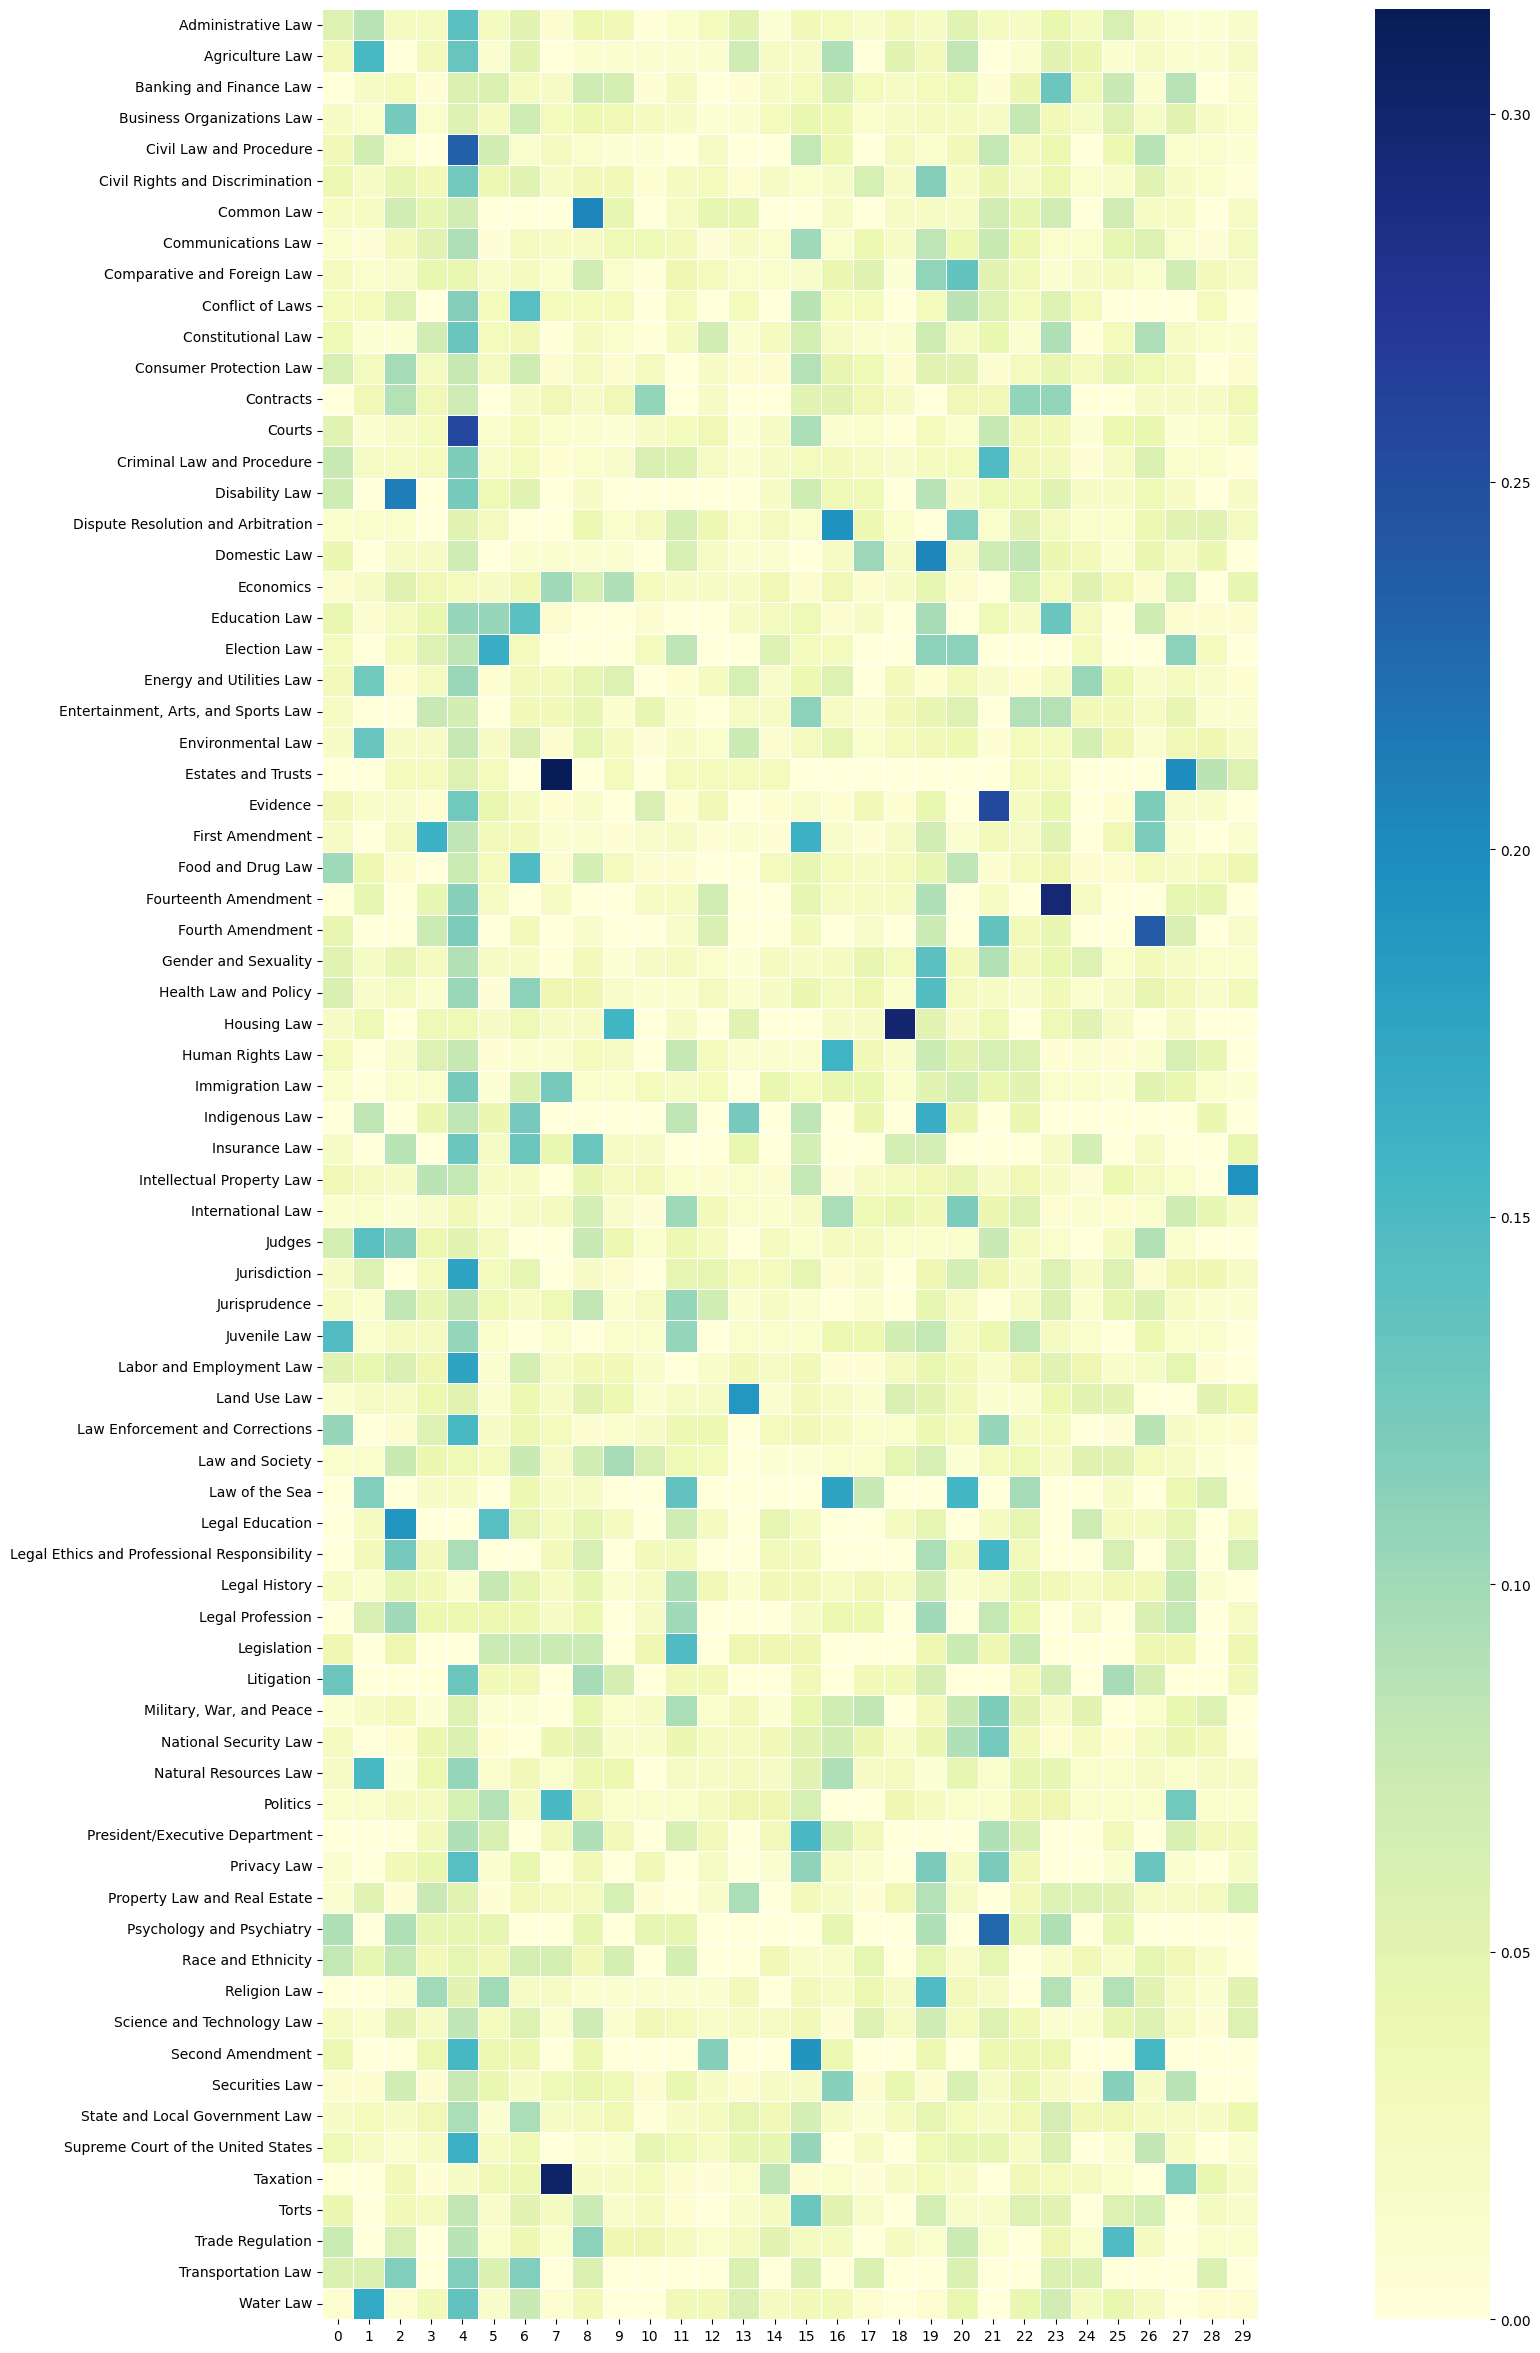

In [ ]:
# Try a heatmap to visualize...

x = num_topics
y = len(set(x for l in df['subject'] for x in l))
heatmap = np.zeros((x,y))

subject_list = list(set(x for l in df['subject'] for x in l))
subject_list.sort()

topic_list = list(range(0,num_topics))

for i in range(0,x):
  for j in range(0,y):
    keywords = list(x for l in keyword_matrix[i] for x in l)
    heatmap[i,j] = keywords.count(subject_list[j])

heatmap_df = pd.DataFrame(heatmap, index=topic_list, columns=subject_list)

# Normalize
for col in heatmap_df.columns:
  heatmap_df[col] = heatmap_df[col] / heatmap_df[col].sum()

# plot as a heatmap
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(heatmap_df.T, cmap="YlGnBu", square=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
# Perform more subject collapsing based on above results and subject knowledge

# Make a copy of our test/train dfs
train_clean = train[train['subject'].notna()]
test_clean = test[test['subject'].notna()]

# Define topics to collapse
collapse_list = {
    'Estates and Trusts':'Taxation',
    'Military, War, and Peace':'National Security Law',
    'Law of the Sea':'National Security Law',
    'Legal Ethics and Professional Responsibility':'Legal Profession',
    'Judges':'Legal Profession',
    'Legal History':'Legal Profession',
    'Legal Education':'Legal Profession',
    'Comparative and Foreign Law':'International Law',
    'Conflict of Laws':'International Law',
    'Psychology and Psychiatry':'Law and Society',
    'Politics':'Law and Society',
    'Banking and Finance Law':'Commercial Law',
    'Consumer Protection Law':'Commercial Law',
    'Contracts':'Commercial Law',
    'First Amendment':'Constitutional Law',
    'Evidence':'Constitutional Law',
    'Privacy Law':'Constitutional Law',
    'President/Executive Department':'Administrative Law',
    'Law Enforcement and Corrections':'Criminal Law and Procedure',
    'Natural Resources Law':'Environmental Law',
    'Water Law':'Environmental Law',
    'Land Use Law':'Environmental Law',
    'Energy and Utilities Law':'Environmental Law',
    'Election Law':'Administrative Law',
    'Second Amendment':'Constitutional Law',
    'Religion Law':'Civil Rights and Discrimination',
    'Fourteenth Amendment':'Constitutional Law',
    'Fourth Amendment':'Constitutional Law',
    'Disability Law':'Civil Rights and Discrimination',
    'Labor and Employment Law':'Civil Rights and Discrimination',
    'Gender and Sexuality':'Civil Rights and Discrimination',
    'Juvenile Law':'Domestic Law',
    # 'Supreme Court of the United States':'Courts',
    'Property Law and Real Estate':'Natural Resources Law'

}

# Function to replace old with new subject terms
def collapse_subjects(subject_list):
  if subject_list:
    for i in range(0,len(subject_list)):
      for old, new in collapse_list.items():
        subject_list[i] = subject_list[i].replace(old, new)
  return subject_list

# Apply to test_clean and train_clean
for i, r in train_clean.iterrows():
  train_clean.loc[i,'subject'] = collapse_subjects(train_clean.loc[i,'subject'])
for i, r in test_clean.iterrows():
  test_clean.loc[i,'subject'] = collapse_subjects(test_clean.loc[i,'subject'])

display(train_clean['subject'].head())

,subject
1595,[Human Rights Law]
921,"[Administrative Law, Commercial Law]"
123,"[Civil Rights and Discrimination, Civil Rights..."
687,"[Supreme Court of the United States, Constitut..."
217,[Intellectual Property Law]


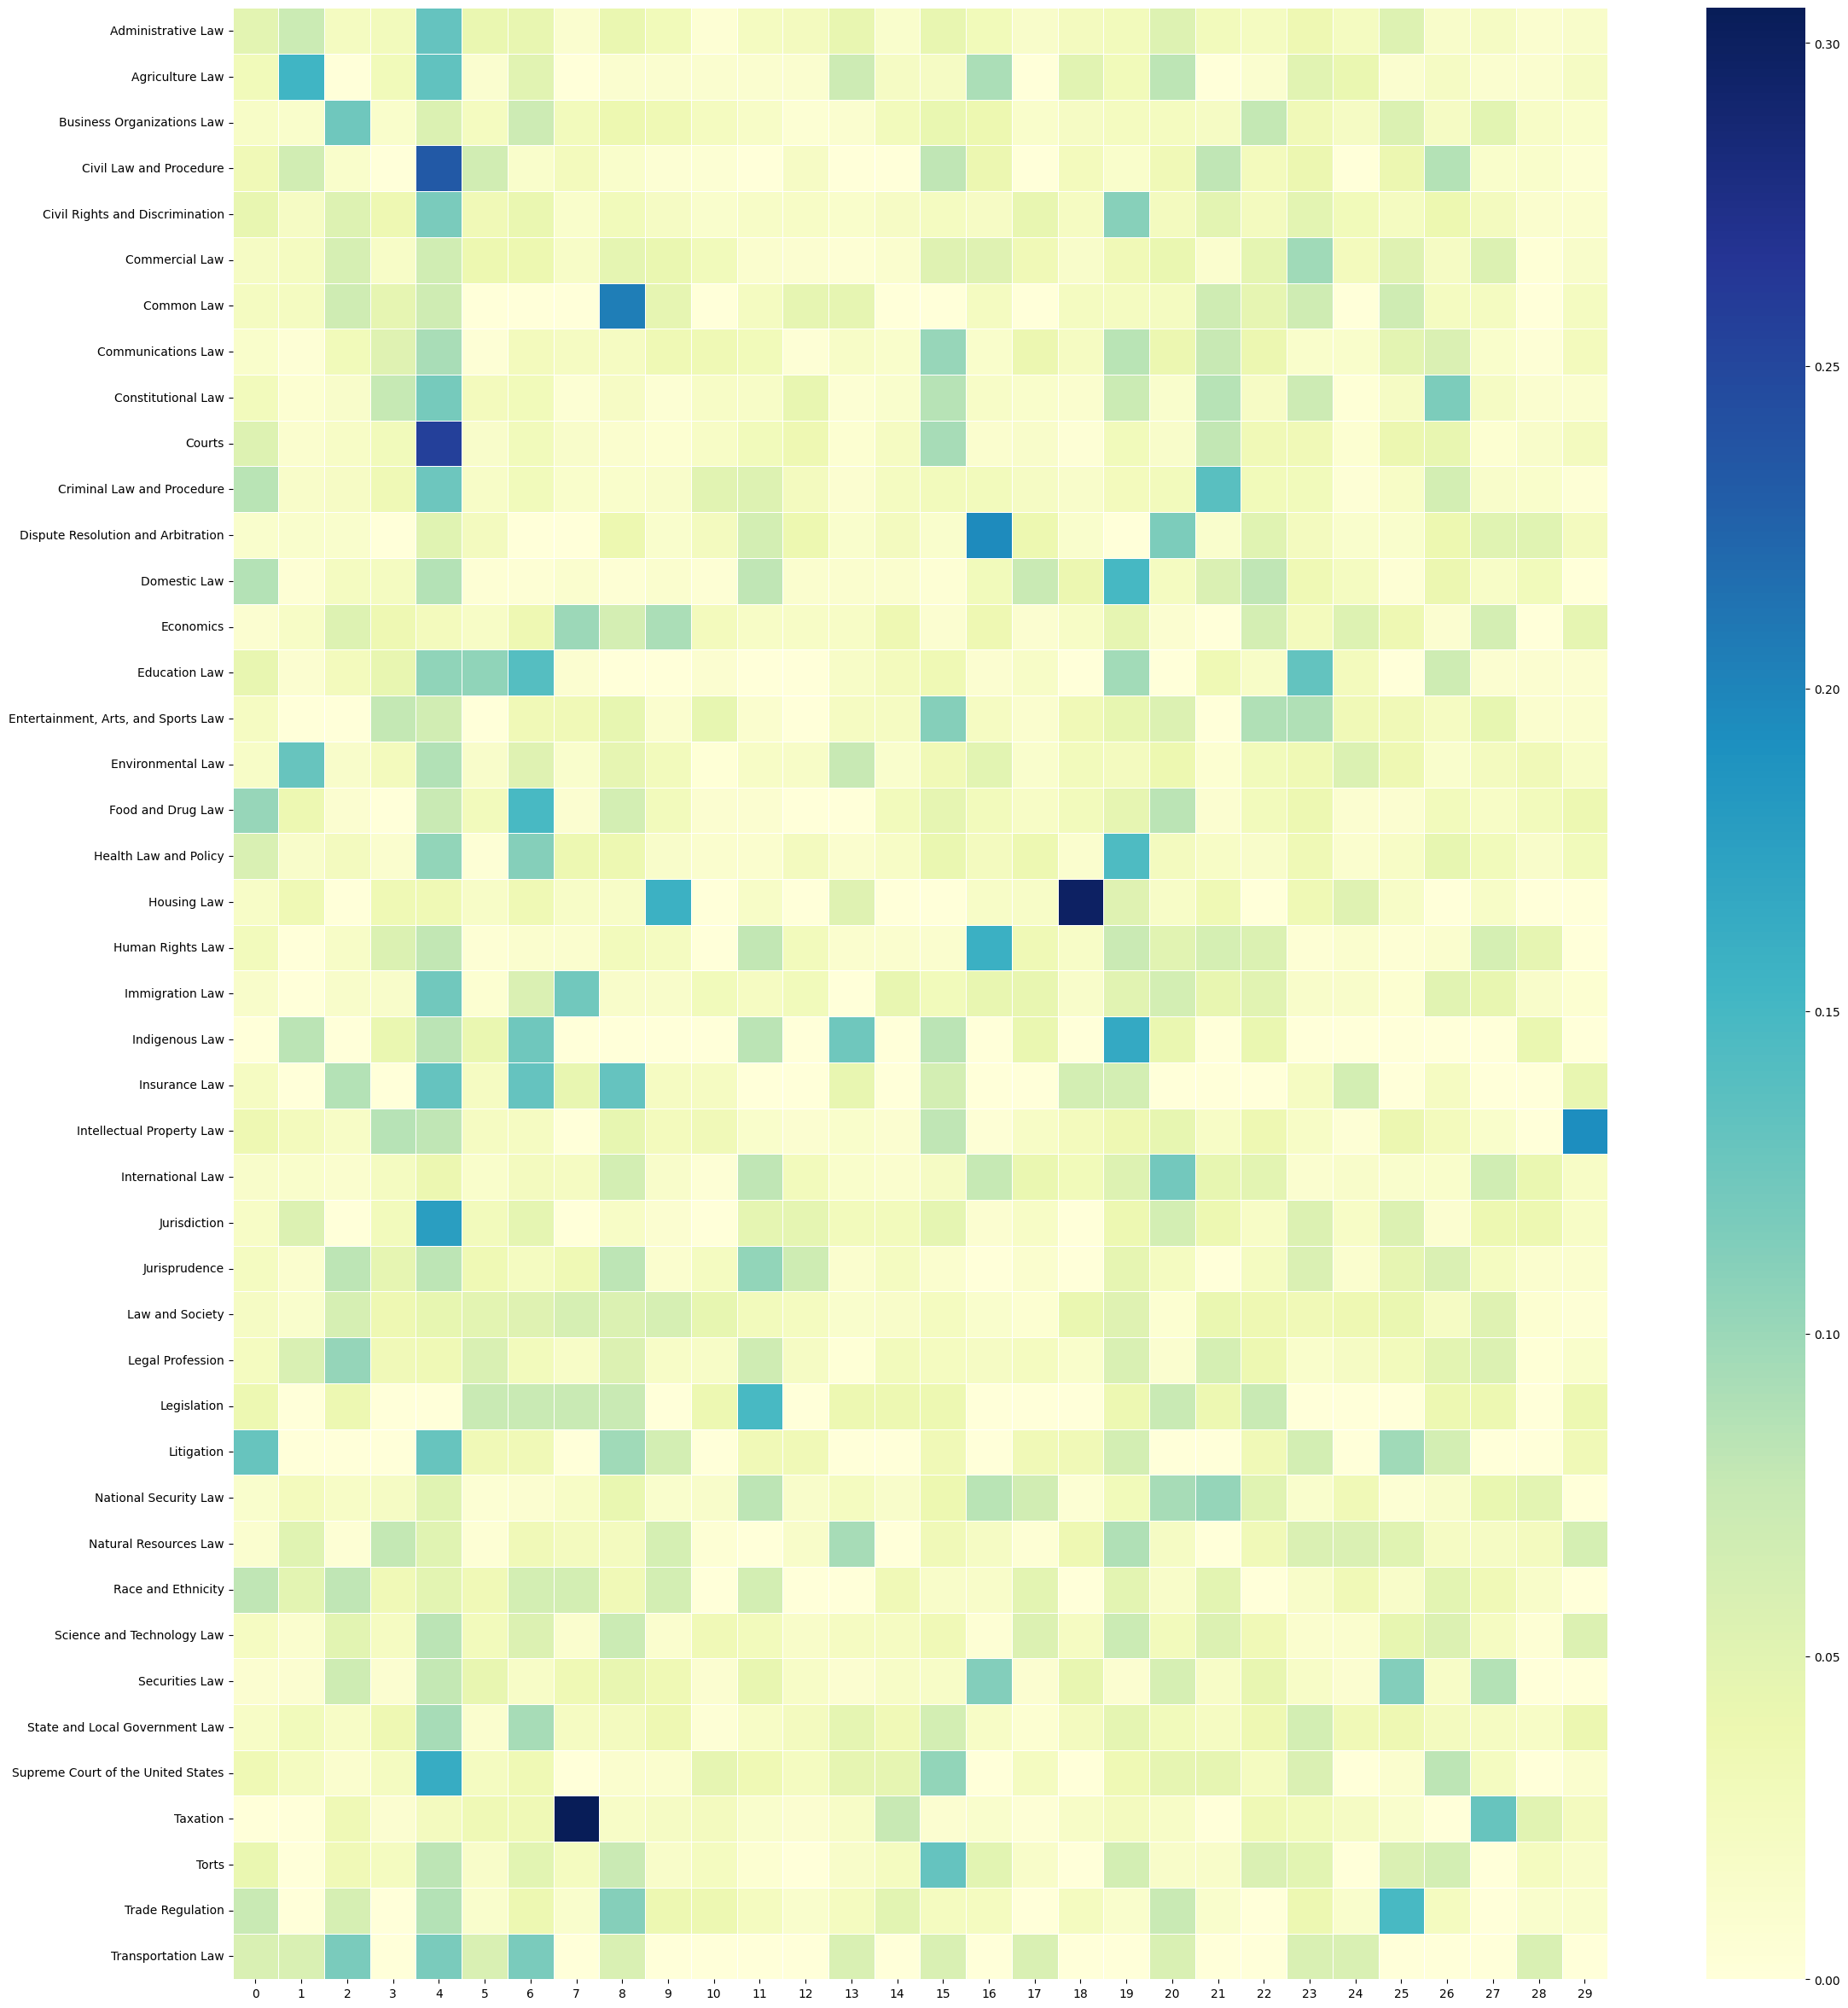

In [ ]:
# Repeat our Heatmap

keyword_matrix = [[] for i in range(num_topics)]

# iterate over train
for i, r in train.iterrows():
  # iterate through topics
  for t in r['topics']:
    keyword_matrix[t].append(r['subject'])

x = num_topics
y = len(set(x for l in df['subject'] for x in l))
heatmap = np.zeros((x,y))

subject_list = list(set(x for l in df['subject'] for x in l))
subject_list.sort()

topic_list = list(range(0,num_topics))

for i in range(0,x):
  for j in range(0,y):
    keywords = list(x for l in keyword_matrix[i] for x in l)
    heatmap[i,j] = keywords.count(subject_list[j])

heatmap_df = pd.DataFrame(heatmap, index=topic_list, columns=subject_list)

# Normalize
for col in heatmap_df.columns:
  heatmap_df[col] = heatmap_df[col] / heatmap_df[col].sum()

# plot as a heatmap
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(heatmap_df.T, cmap="YlGnBu", square=True, linewidths=.5, ax=ax)
plt.show()

,subject
1595,[International Law]
921,"[Administrative Law, Commercial Law]"
123,"[Civil Rights and Discrimination, Civil Rights..."
687,"[Supreme Court of the United States, Constitut..."
217,[Intellectual Property Law]


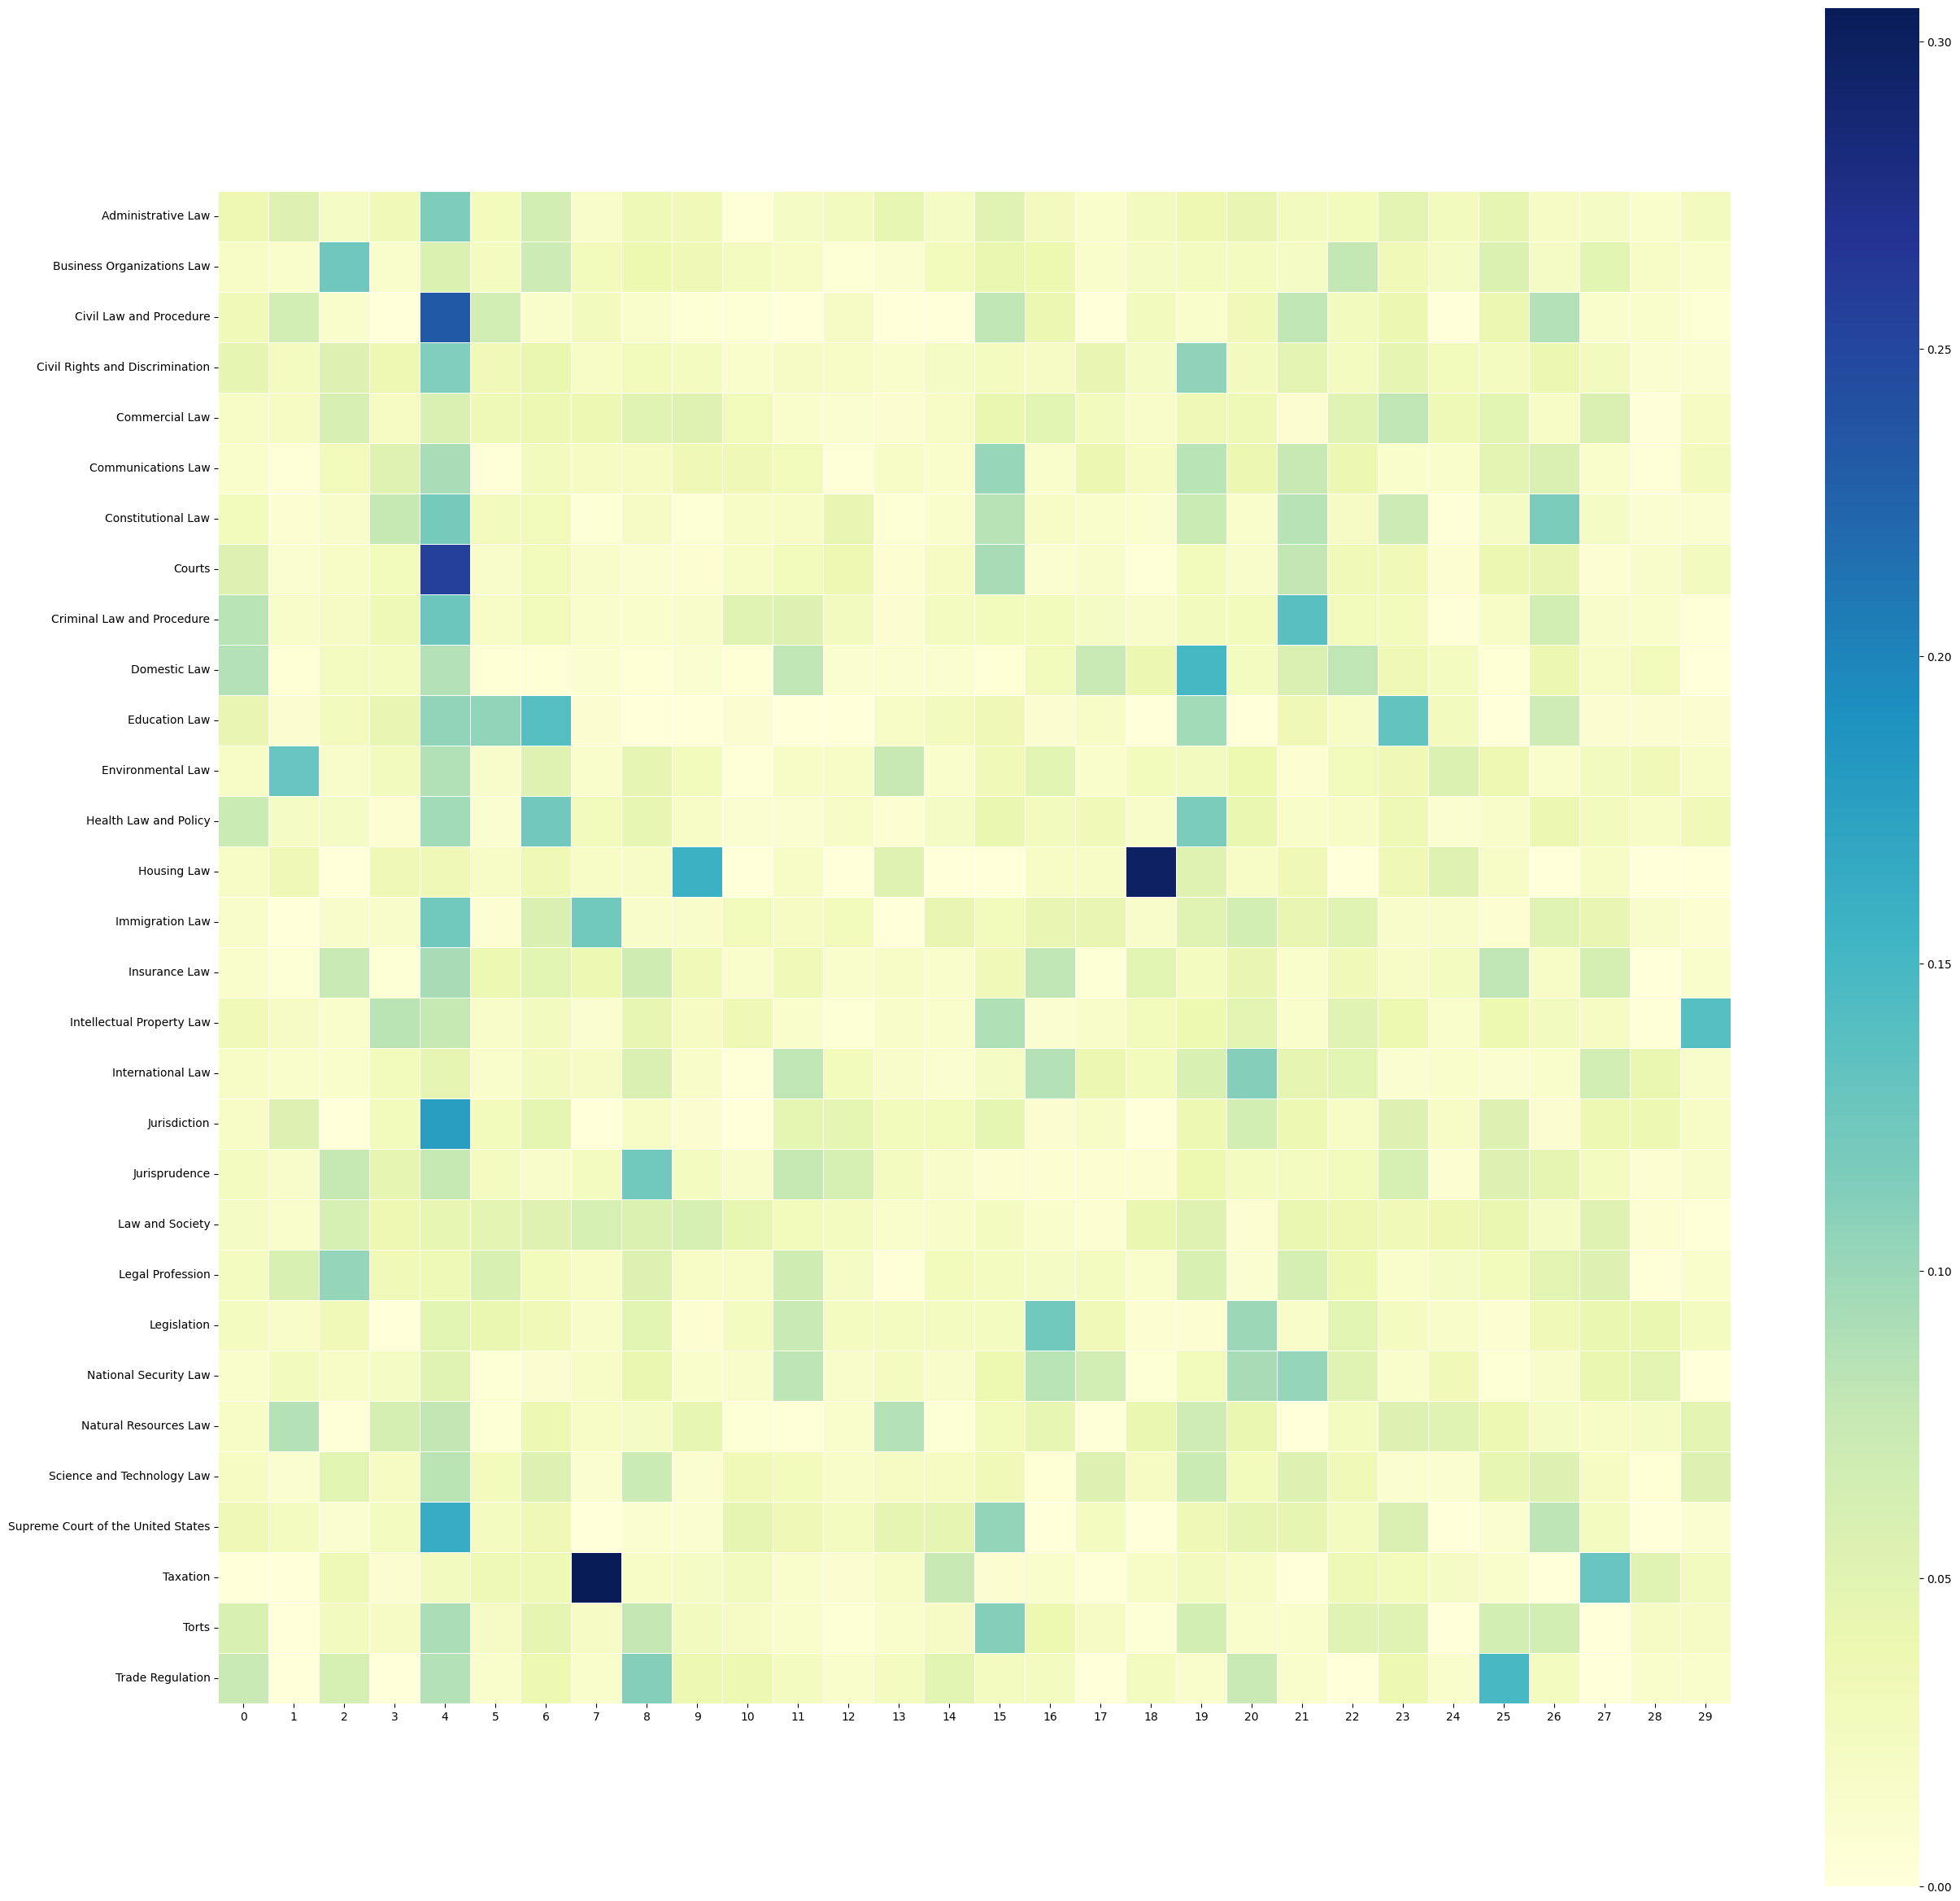

In [ ]:
# Define topics to collapse, again
collapse_list = {
    'Agriculture Law':'Natural Resources Law',
    'State and Local Government Law':'Administrative Law',
    'Military, War, and Peace':'National Security Law',
    'Race and Ethnicity':'Civil Rights and Discrimination',
    # 'Natural Resources Law':'Environmental Law',
    'Human Rights Law':'International Law',
    'Dispute Resolution and Arbitration':'Legislation',
    'Economics':'Commercial Law',
    'Securities Law':'Insurance Law',
    'Litigation':'Torts',
    'Food and Drug Law':'Health Law and Policy',
    'Transportation Law':'Legislation',
    'Indigenous Law':'International Law',
    'Entertainment, Arts, and Sports Law':'Intellectual Property Law',
    'Common Law':'Jurisprudence'
}

# Function to replace old with new subject terms
def collapse_subjects(subject_list):
  if subject_list:
    for i in range(0,len(subject_list)):
      for old, new in collapse_list.items():
        subject_list[i] = subject_list[i].replace(old, new)
  return subject_list

# Apply to test_clean and train_clean
for i, r in train_clean.iterrows():
  train_clean.loc[i,'subject'] = collapse_subjects(train_clean.loc[i,'subject'])
for i, r in test_clean.iterrows():
  test_clean.loc[i,'subject'] = collapse_subjects(test_clean.loc[i,'subject'])

display(train_clean['subject'].head())

# Repeat our Heatmap

keyword_matrix = [[] for i in range(num_topics)]

# iterate over train
for i, r in train.iterrows():
  # iterate through topics
  for t in r['topics']:
    keyword_matrix[t].append(r['subject'])

x = num_topics
y = len(set(x for l in df['subject'] for x in l))
heatmap = np.zeros((x,y))

subject_list = list(set(x for l in df['subject'] for x in l))
subject_list.sort()

topic_list = list(range(0,num_topics))

for i in range(0,x):
  for j in range(0,y):
    keywords = list(x for l in keyword_matrix[i] for x in l)
    heatmap[i,j] = keywords.count(subject_list[j])

heatmap_df = pd.DataFrame(heatmap, index=topic_list, columns=subject_list)

# Normalize
for col in heatmap_df.columns:
  heatmap_df[col] = heatmap_df[col] / heatmap_df[col].sum()

# plot as a heatmap
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(heatmap_df.T, cmap="YlGnBu", square=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
# Check category distribution
train_duples = pd.Series(list(x for l in train_clean['subject'] for x in l)).value_counts()
print("Final subject counts, TRAIN")
print(train_duples)
print(f'Total Subjects: {len(train_duples)}\n')

test_duples = pd.Series(list(x for l in test_clean['subject'] for x in l)).value_counts()
print("Final subject counts, TEST")
print(test_duples)
print(f'Total Subjects: {len(test_duples)}')


Final subject counts, TRAIN
International Law                     456
Environmental Law                     451
Civil Rights and Discrimination       432
Criminal Law and Procedure            337
Constitutional Law                    325
Administrative Law                    262
Commercial Law                        181
Health Law and Policy                 154
Legal Profession                      127
Intellectual Property Law             125
Natural Resources Law                 124
National Security Law                 120
Courts                                114
Business Organizations Law            113
Law and Society                       111
Taxation                              102
Communications Law                     88
Domestic Law                           77
Civil Law and Procedure                72
Science and Technology Law             71
Torts                                  65
Insurance Law                          64
Jurisprudence                          59
Educat

## Apply MultiLabel Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text

def doc_preprep_tfidf(docDF):
  docs = docDF.tolist()

  # Remove stopwords
  from gensim.parsing.preprocessing import remove_stopwords
  docs = [remove_stopwords(doc) for doc in docs]

  # Split the documents into tokens.
  tokenizer = RegexpTokenizer(r'\w+')
  for idx in range(len(docs)):
      docs[idx] = docs[idx].lower()  # Convert to lowercase.
      docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

  # Remove numbers, but not words that contain numbers.
  docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

  # Remove words that are only one or two characters.
  docs = [[token for token in doc if len(token) > 2] for doc in docs]

  # Lemmatize the documents.
  from nltk.stem.wordnet import WordNetLemmatizer

  lemmatizer = WordNetLemmatizer()
  docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

  # Remove other stop words
  stop_words = ['comment', 'note', 'article', 'argues']
  docs = [[token for token in doc if token not in stop_words] for doc in docs]

  docs = [" ".join(doc) for doc in docs]

  return docs

doc_list = doc_preprep_tfidf(df['abstract'])

# Create TF-IDF representation of abstracts
vectorizer = TfidfVectorizer(max_features=2500, max_df=0.9).fit(doc_list)

train_tfidf = vectorizer.transform(doc_preprep_tfidf(train_clean['abstract']))
test_tfidf = vectorizer.transform(doc_preprep_tfidf(test_clean['abstract']))

print(train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 86455 stored elements and shape (1576, 2500)>
  Coords	Values
  (0, 153)	0.06284890399942654
  (0, 257)	0.10040616449449272
  (0, 279)	0.09460073588670838
  (0, 337)	0.09336701799154368
  (0, 400)	0.11474020397675129
  (0, 451)	0.06633181662113352
  (0, 455)	0.09336701799154368
  (0, 460)	0.0816759407469874
  (0, 488)	0.12948737629167806
  (0, 534)	0.10169599408556455
  (0, 561)	0.2248338312366361
  (0, 706)	0.11474020397675129
  (0, 751)	0.07357474988641238
  (0, 790)	0.11099801178485412
  (0, 842)	0.09524550257350449
  (0, 1001)	0.0777393473767449
  (0, 1051)	0.12506970919639673
  (0, 1130)	0.053520130053853275
  (0, 1132)	0.3752091275891901
  (0, 1142)	0.11032253688146994
  (0, 1175)	0.12141347943403283
  (0, 1209)	0.13119033871541813
  (0, 1238)	0.09082783547822312
  (0, 1267)	0.5516126844073497
  (0, 1354)	0.054317767965936764
  :	:
  (1575, 1172)	0.09577052906417549
  (1575, 1187)	0.11911318364138312
  (1575, 1257)	0.0

In [ ]:
# Write processed doc_list to a txt file
docs_df = pd.DataFrame(doc_list, columns=['abstract'])
docs_df.to_csv('docs.csv', index=False)

In [ ]:
# Make our data wide-form boolean on subject terms
from sklearn.preprocessing import MultiLabelBinarizer

# Convert to boolean array
mlb = MultiLabelBinarizer()
y_train_bins = mlb.fit_transform(train_clean['subject'])
y_test_bins = mlb.transform(test_clean['subject'])
y_classes = mlb.classes_

# Convert to DF
y_train = pd.DataFrame(y_train_bins, columns=y_classes)
y_test = pd.DataFrame(y_test_bins, columns=y_classes)

print(y_train.info(), '\n')
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Administrative Law                  1576 non-null   int64
 1   Business Organizations Law          1576 non-null   int64
 2   Civil Law and Procedure             1576 non-null   int64
 3   Civil Rights and Discrimination     1576 non-null   int64
 4   Commercial Law                      1576 non-null   int64
 5   Communications Law                  1576 non-null   int64
 6   Constitutional Law                  1576 non-null   int64
 7   Courts                              1576 non-null   int64
 8   Criminal Law and Procedure          1576 non-null   int64
 9   Domestic Law                        1576 non-null   int64
 10  Education Law                       1576 non-null   int64
 11  Environmental Law                   1576 non-null   int64
 12  Health

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

# Define X and y
X_train = train_tfidf
# y_train = train_clean.drop(['id', 'subject', 'date_published', 'title', 'abstract', 'vector', 'corpus', 'topics'], axis=1)
X_test = test_tfidf
# y_test = test_clean.drop(['id', 'subject', 'date_published', 'title', 'abstract'], axis=1)

# Use MultiOutputClassifier to create a multilabel classifier using Logistic Regression
model_lr = MultiOutputClassifier(LogisticRegression(random_state=1)).fit(X_train, y_train)

# predict test values
prediction_lr = model_lr.predict(X_test)

In [ ]:
from sklearn import svm

# try using SVM
svm_model = MultiOutputClassifier(svm.SVC(kernel='linear', probability=True, random_state=1)).fit(X_train, y_train)
prediction_svm = svm_model.predict(X_test)

In [ ]:
from sklearn import tree

# try using decision trees
tree_model = MultiOutputClassifier(tree.DecisionTreeClassifier(random_state=1)).fit(X_train, y_train)
prediction_tree = tree_model.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# try using a random forest
rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=1)).fit(X_train, y_train)
prediction_rf = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import hamming_loss

# Lower Hamming Loss = more accurate
print('Hamming Loss, LR:  ', round(hamming_loss(y_test, prediction_lr),4))
print('Hamming Loss, SVM: ', round(hamming_loss(y_test, prediction_svm),4))
print('Hamming Loss, Tree:', round(hamming_loss(y_test, prediction_tree),4))
print('Hamming Loss, RF:  ', round(hamming_loss(y_test, prediction_rf),4))

Hamming Loss, LR:   0.0664
Hamming Loss, SVM:  0.0512
Hamming Loss, Tree: 0.0739
Hamming Loss, RF:   0.0582


In [ ]:
# Visualize our outputs and compute confusion matrix

def visualize_outputs(y_test, prediction, title_text, n=[0,-1]):

  # initialize a matrix for map and confusion matrix
  output_map = np.zeros((len(y_test),len(y_test.columns)))
  conf_matrix = np.zeros((2,2))

  # iterate over y_test and prediction
  for i in range(len(y_test)):
    for j in range(len(y_test.columns)):

        # define value based on [true neg (default), false neg, false pos, true pos]
        if y_test.iloc[i,j] == 1 and prediction.iloc[i,j] == 0:
          output_map[i,j] = 1
          conf_matrix[1,0] += 1
        elif y_test.iloc[i,j] == 0 and prediction.iloc[i,j] == 1:
          output_map[i,j] = 2
          conf_matrix[0,1] += 1
        elif y_test.iloc[i,j] == 1 and prediction.iloc[i,j] == 1:
          output_map[i,j] = 3
          conf_matrix[1,1] += 1
        else:
          conf_matrix[0,0] += 1

  # define col names
  col_names = y_test.columns.tolist()

  # Create a DF
  output_df = pd.DataFrame(output_map, columns=col_names)

  # create a heatmap
  fig, ax = plt.subplots(figsize=(30,30))
  sns.heatmap(output_df[n[0]:n[1]], cmap=['#ECECEC', '#CED54B', '#CB4747', '#7EE081'], linewidths=.5, ax=ax)

  # Set colorbar
  colorbar = ax.collections[0].colorbar
  colorbar.set_ticks([0.375, 1.125, 1.875, 2.625])
  colorbar.set_ticklabels(['True Neg', 'False Neg', 'False Pos', 'True Pos'])

  plt.title(title_text)
  plt.show()

  return conf_matrix

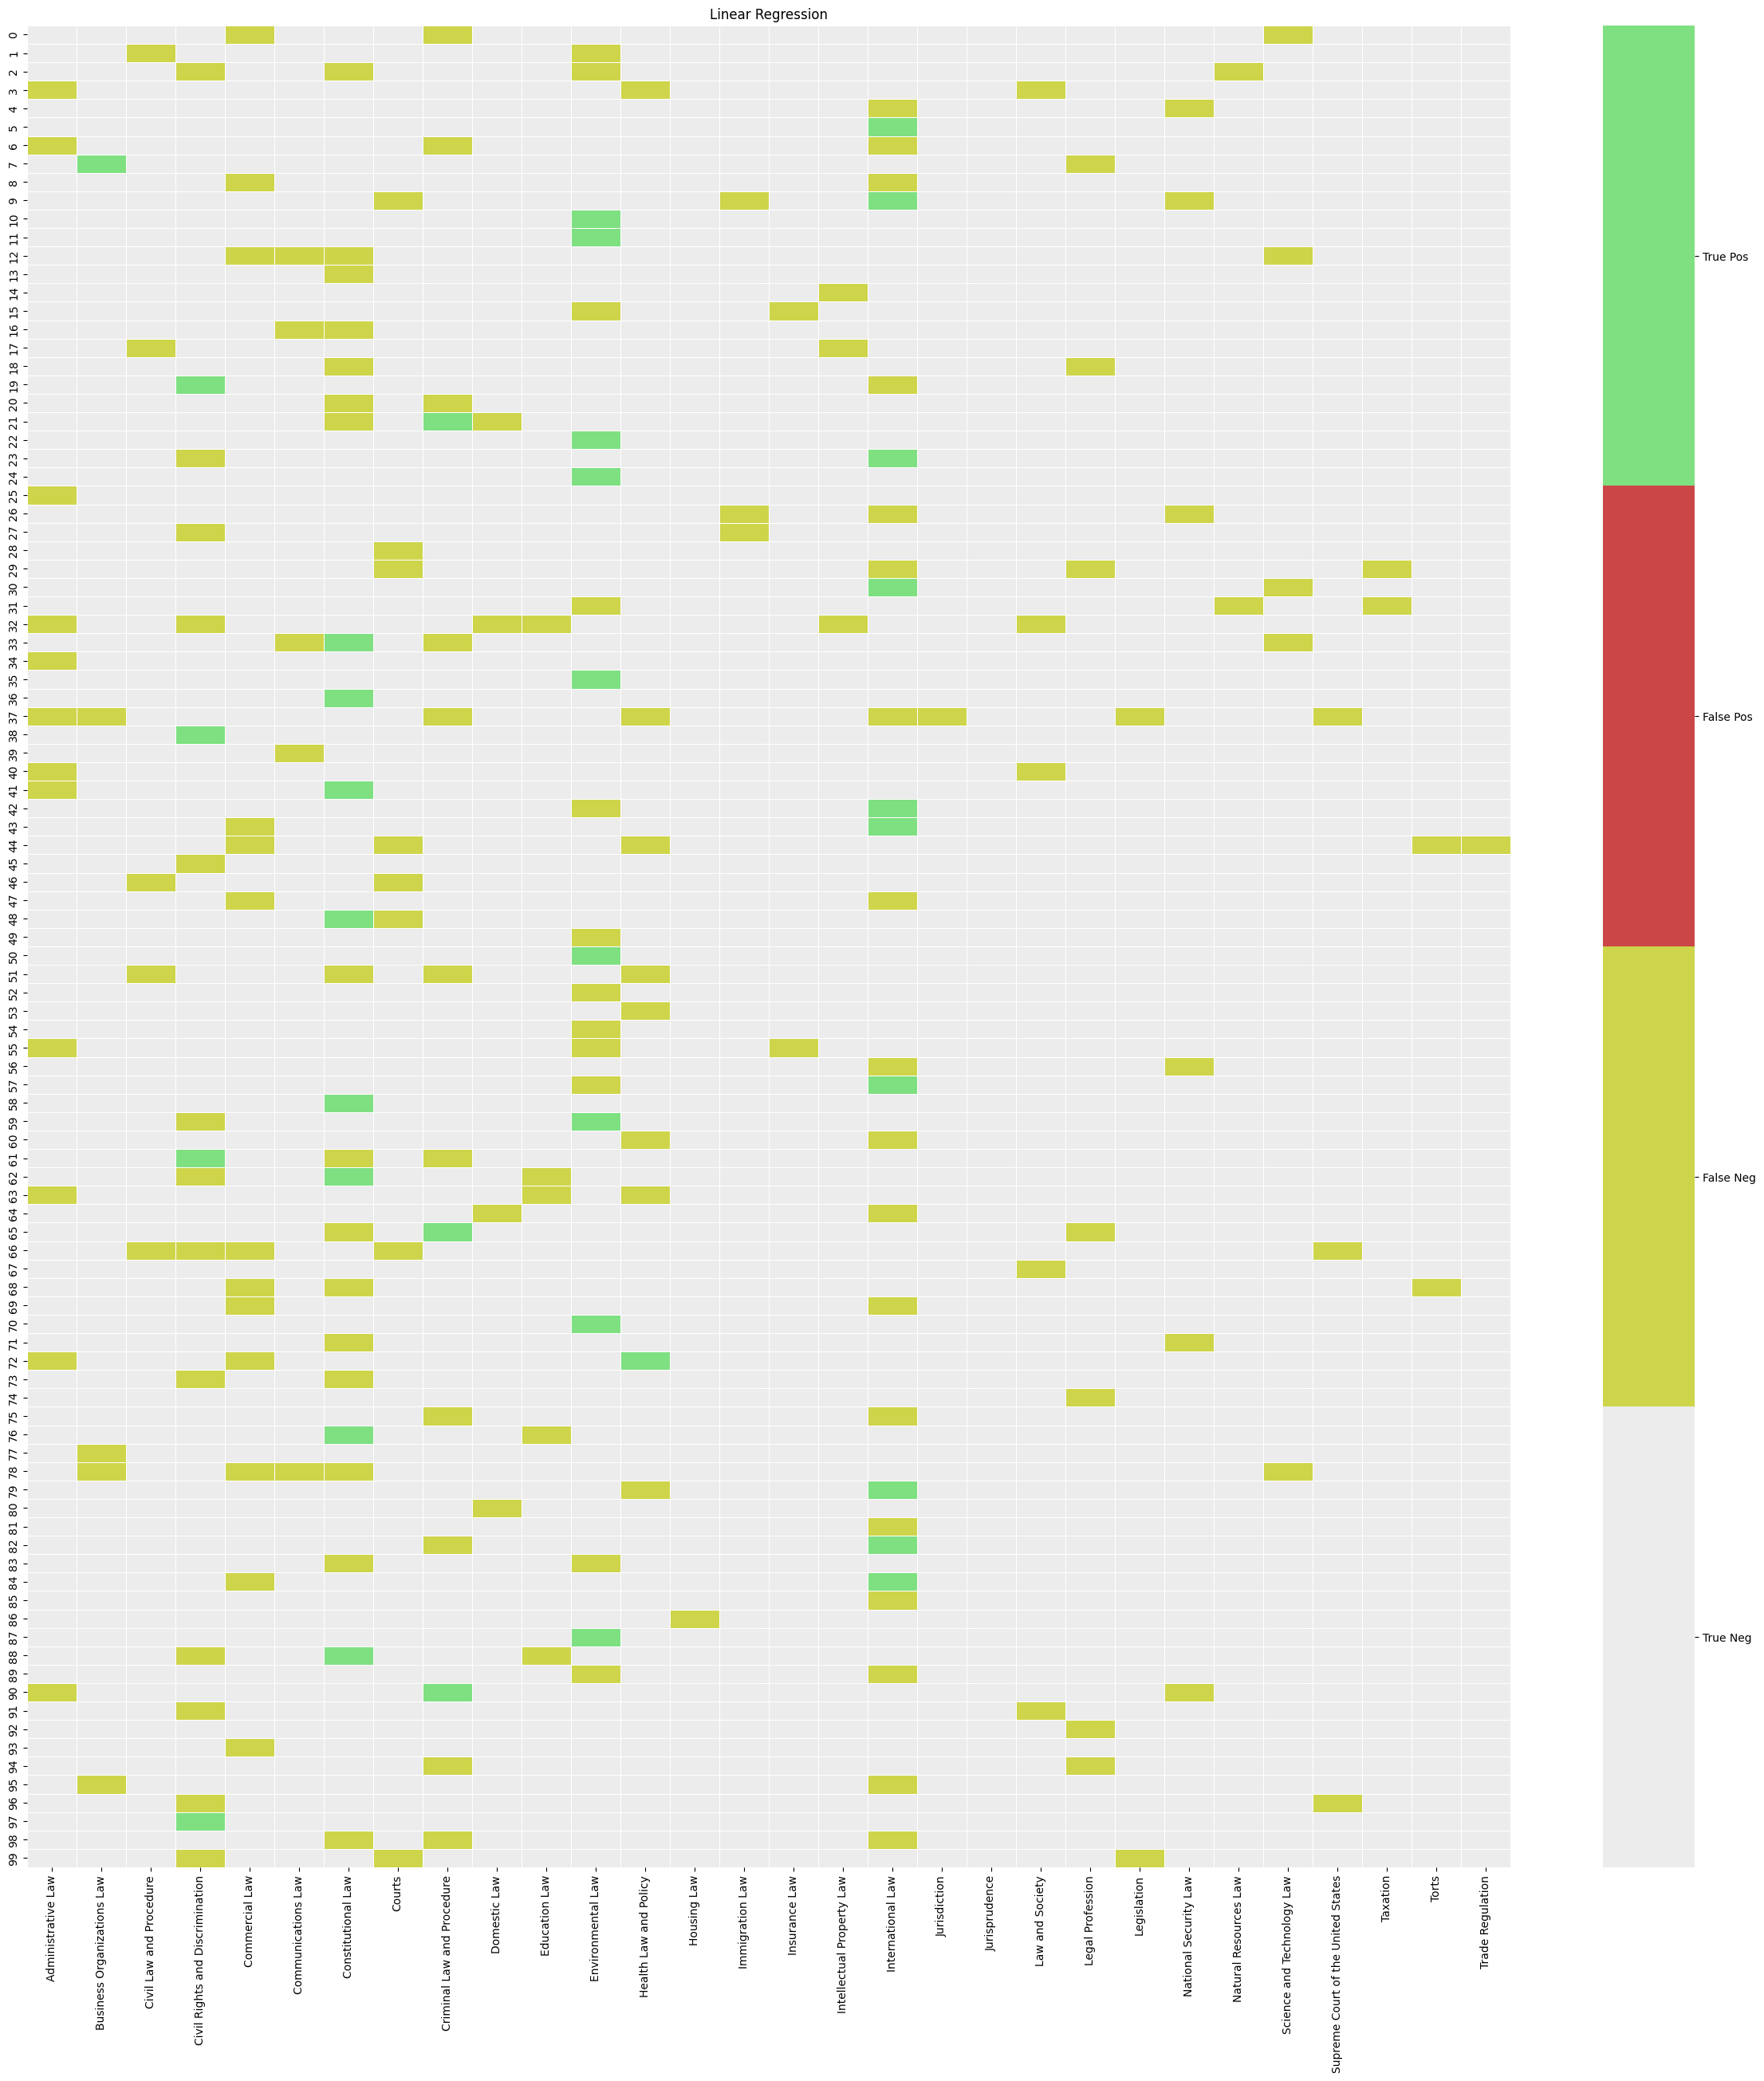

In [ ]:
# Visualize various methods
linear_results = visualize_outputs(y_test, pd.DataFrame(prediction_lr),"Linear Regression",[0,100])

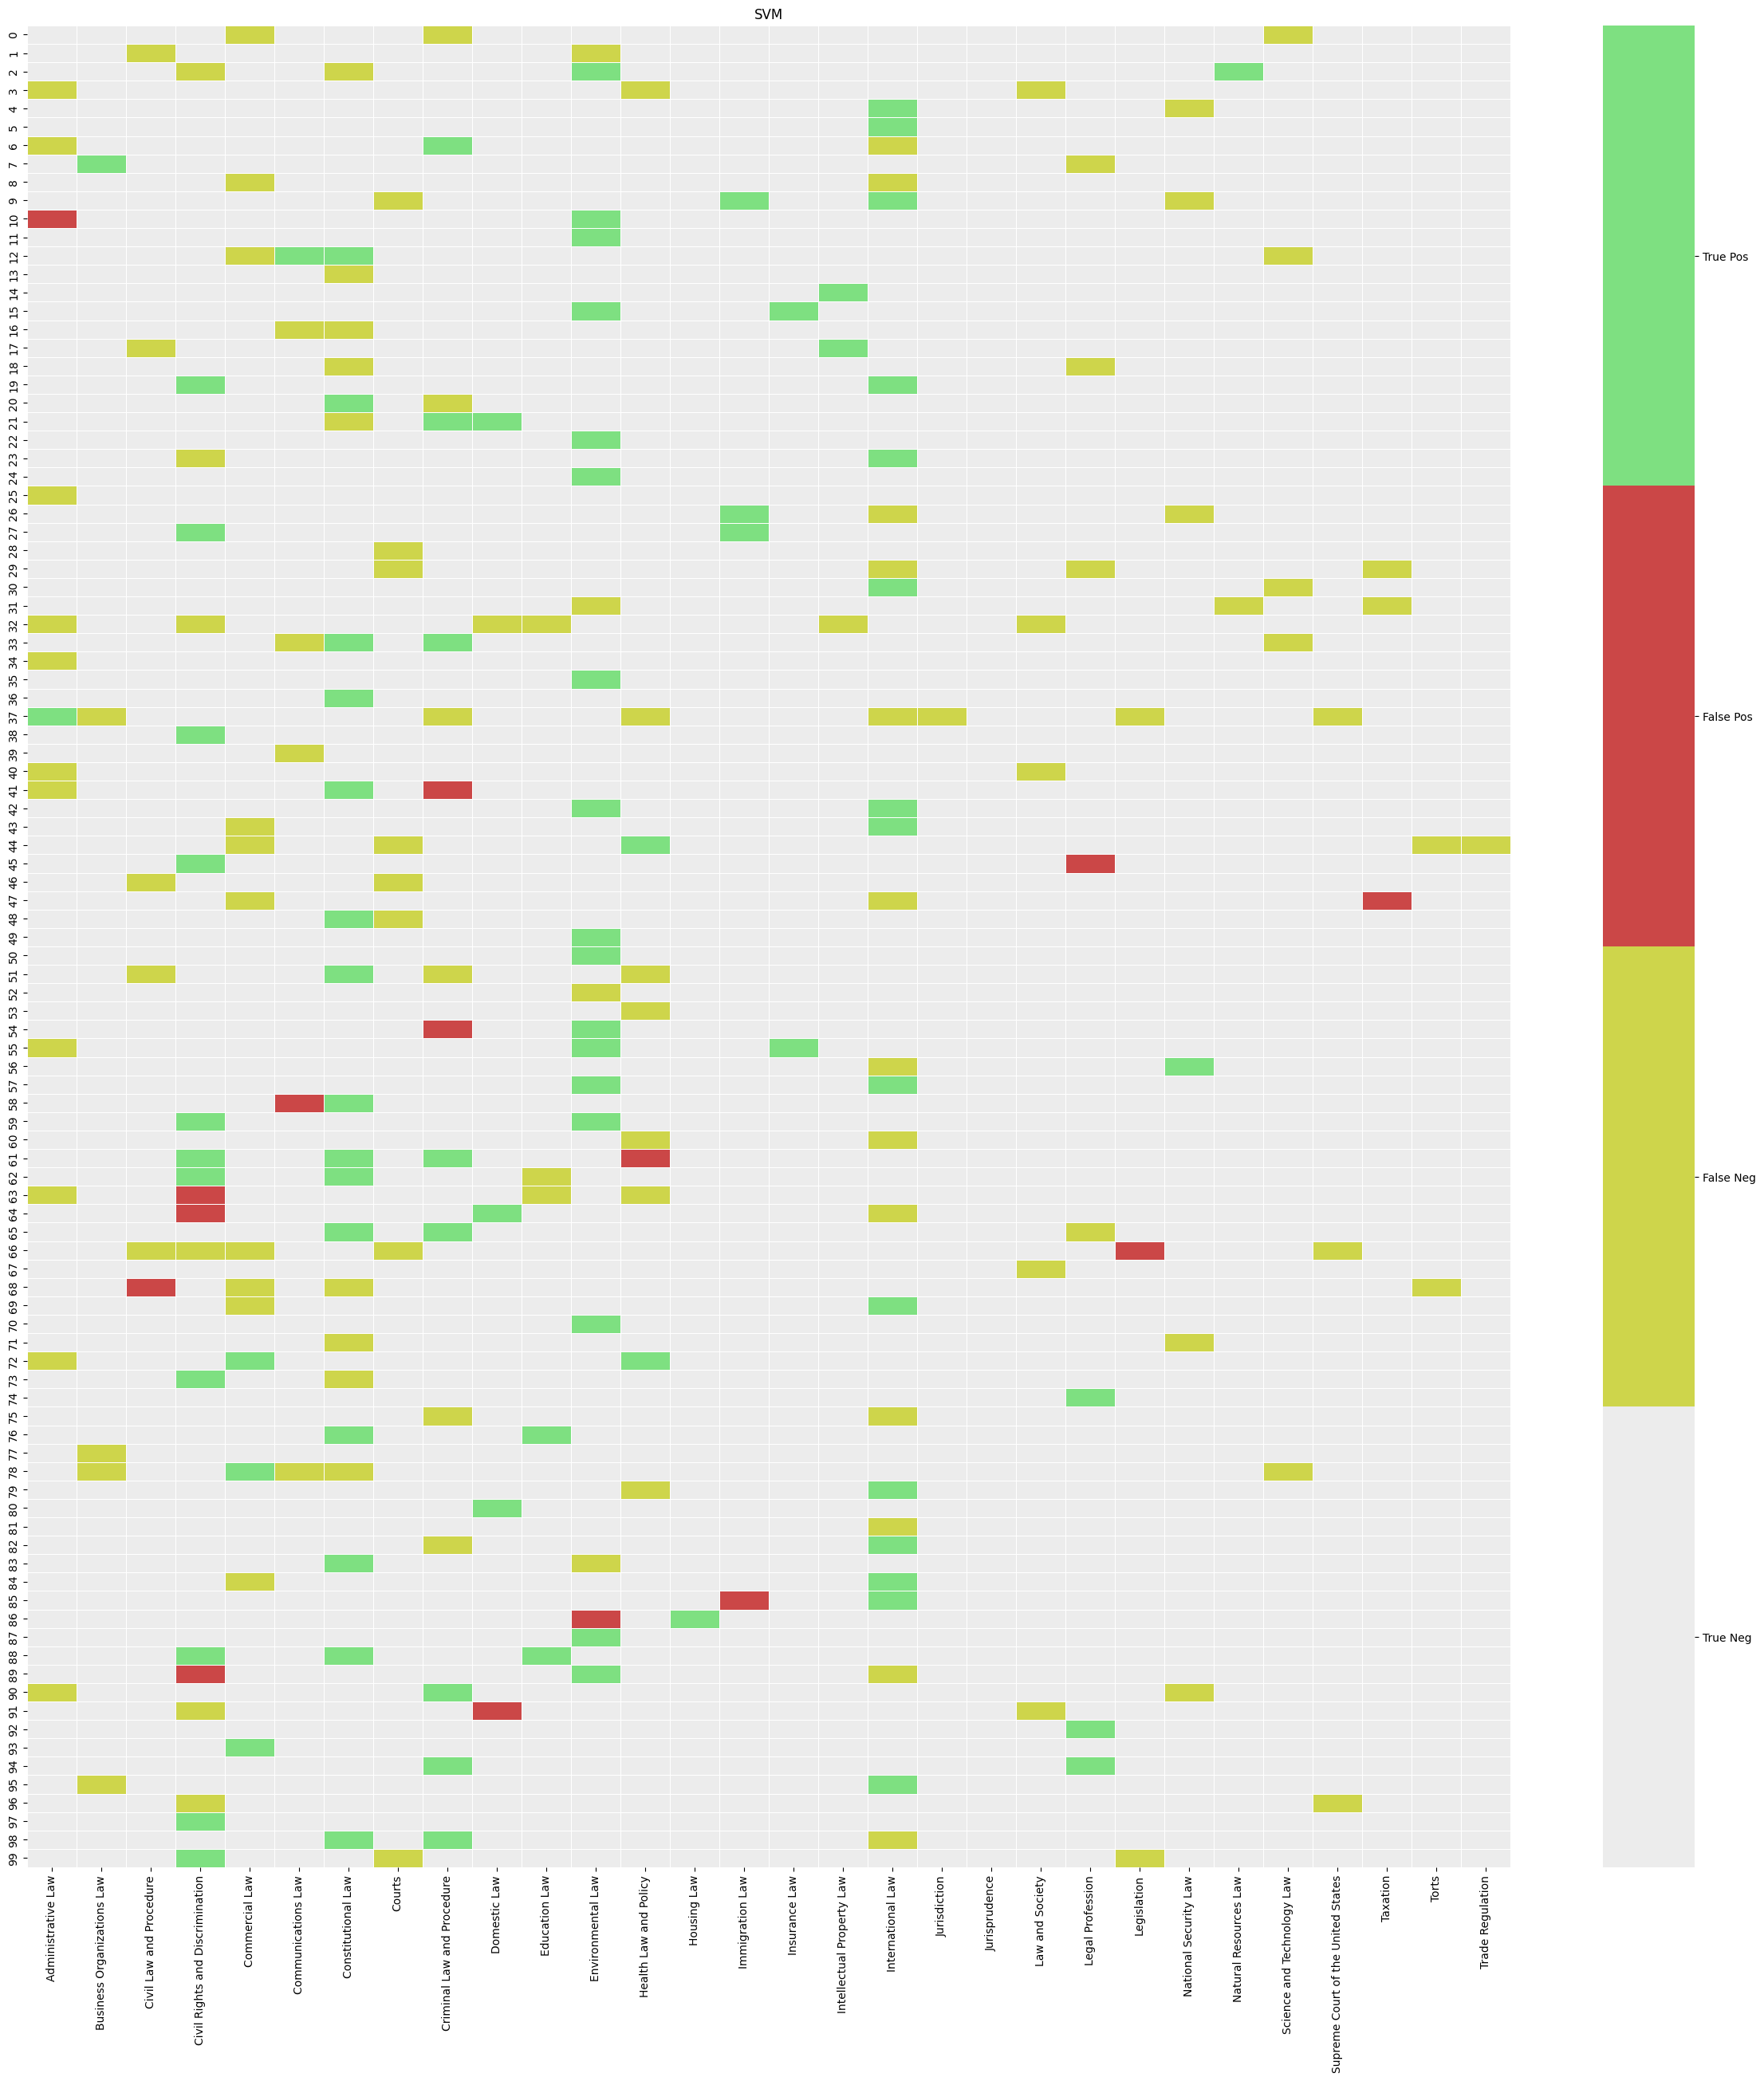

In [ ]:
svm_result = visualize_outputs(y_test, pd.DataFrame(prediction_svm),"SVM",[0,100])

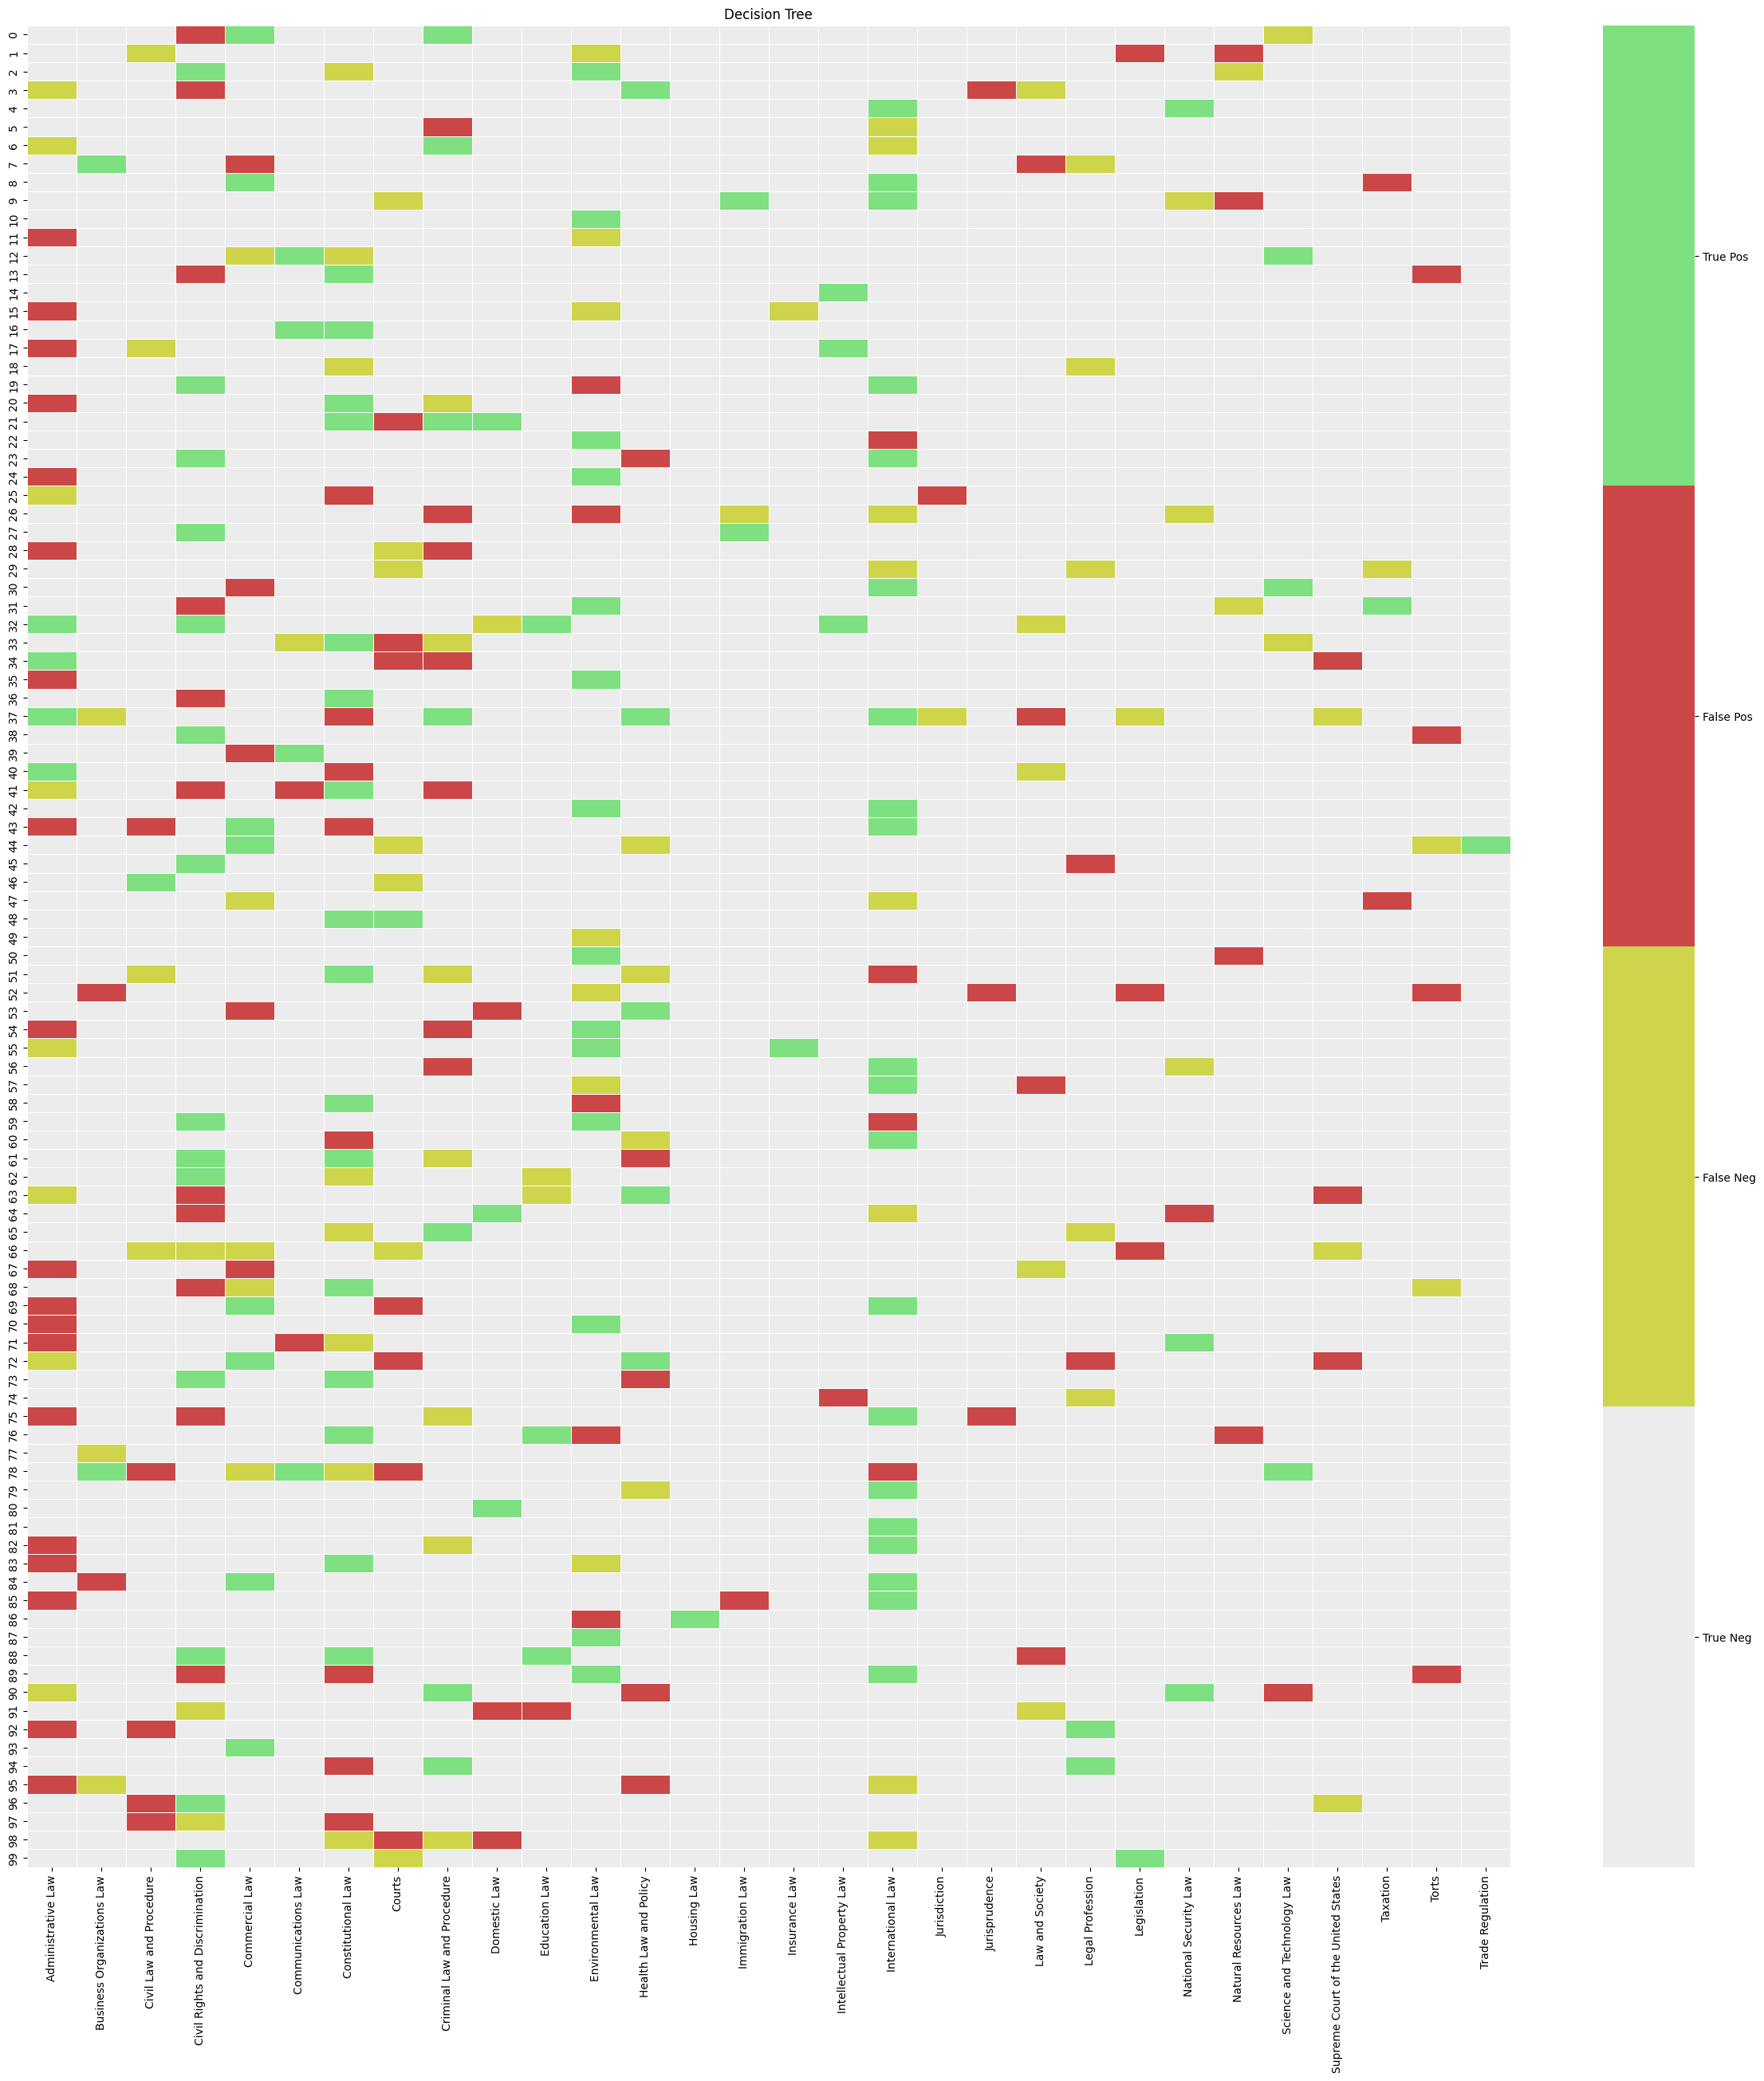

In [ ]:
tree_results = visualize_outputs(y_test, pd.DataFrame(prediction_tree),"Decision Tree",[0,100])

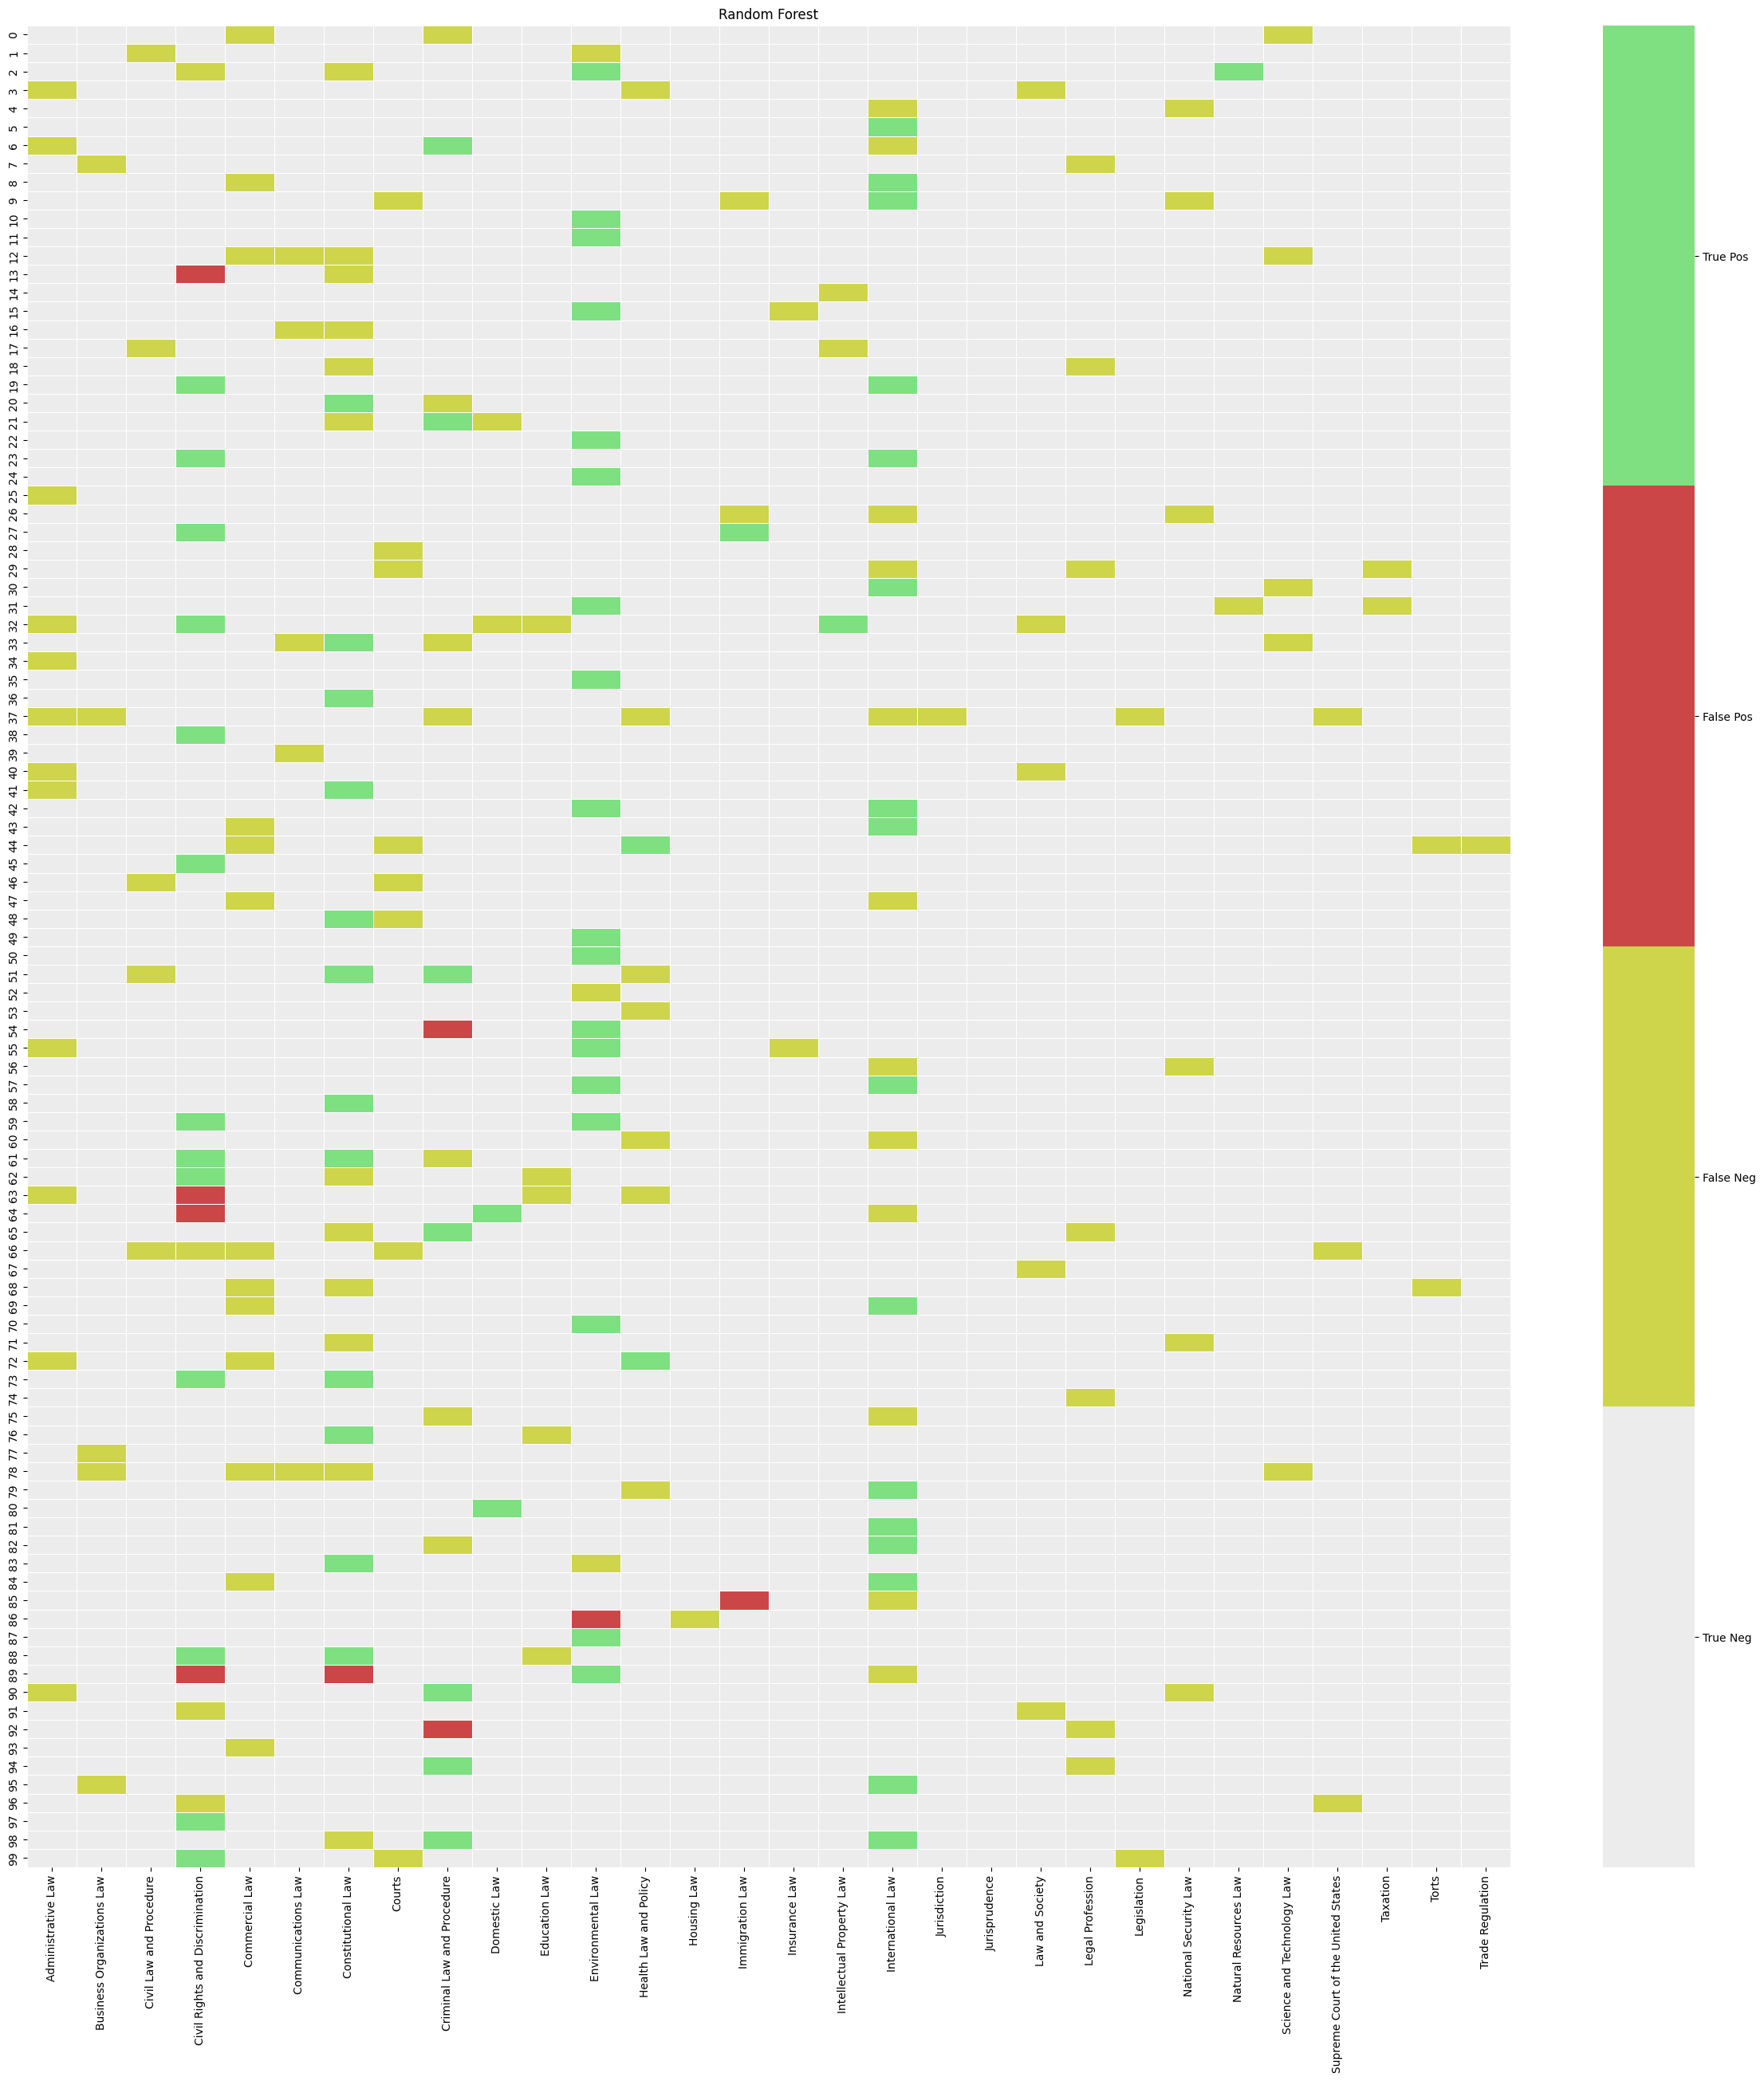

In [ ]:
rf_results = visualize_outputs(y_test, pd.DataFrame(prediction_rf),"Random Forest",[0,100])

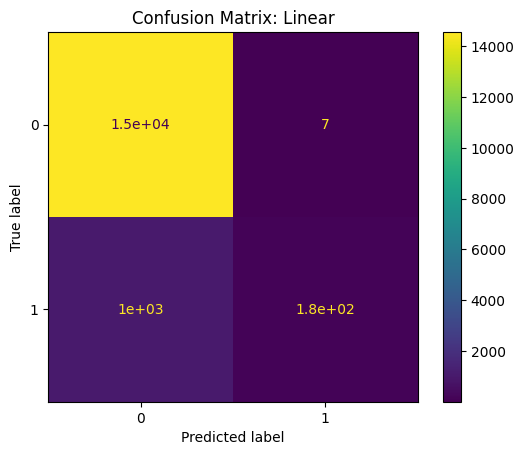

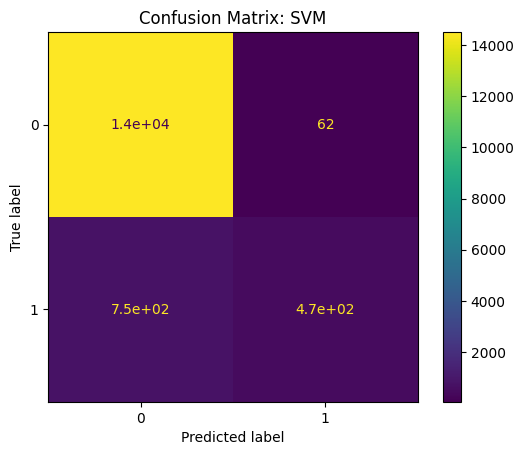

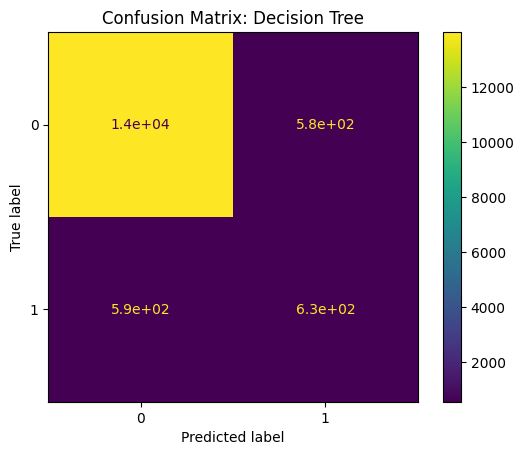

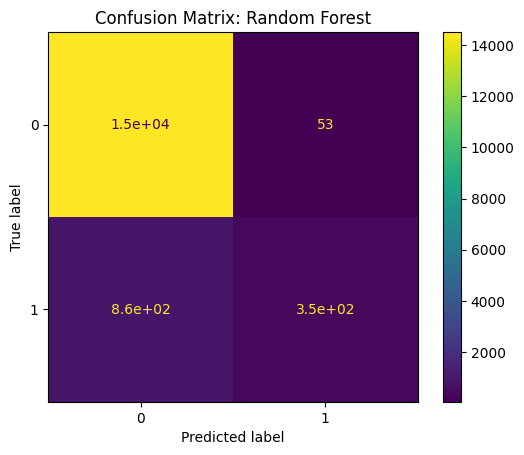

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrices
for result in [[linear_results, "Linear"], [svm_result, 'SVM'], [tree_results, 'Decision Tree'], [rf_results, 'Random Forest']]:
  # result[0] = result[0] / result[0].sum()
  disp = ConfusionMatrixDisplay(confusion_matrix=result[0])
  disp.plot()
  plt.title(f'Confusion Matrix: {result[1]}')
  plt.show()

## Optimizing SVM

In [ ]:
#recall that y_train and y_test are our keyword matrices

# view sum of each column
keyword_freq_train = y_train.sum()
keyword_freq_test = y_test.sum()

print("Training Set:")
print(keyword_freq_train.sort_values(), '\n')
print("Test Set:")
print(keyword_freq_test.sort_values(), '\n')

Training Set:
Housing Law                            27
Trade Regulation                       31
Supreme Court of the United States     40
Jurisdiction                           43
Legislation                            48
Education Law                          52
Immigration Law                        52
Jurisprudence                          58
Civil Law and Procedure                61
Insurance Law                          63
Torts                                  63
Taxation                               69
Science and Technology Law             71
Domestic Law                           72
Communications Law                     81
Business Organizations Law            100
Legal Profession                      104
National Security Law                 104
Law and Society                       108
Courts                                114
Intellectual Property Law             118
Natural Resources Law                 120
Health Law and Policy                 127
Commercial Law      

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, cross_validate
# Ues GridSearchCV to cross-validate & tune hyperparameters

# Define models to test
C = [0.1, 1, 10, 100]
svm_linear = [svm.SVC(kernel="linear", probability=False, class_weight="balanced", random_state=1, C=C[i]) for i in range(len(C))]
svm_rfb = [svm.SVC(kernel="rbf", probability=False, class_weight="balanced", random_state=1, C=C[i]) for i in range(len(C))]
svm_list = svm_linear + svm_rfb
estimators = {'estimator':svm_list}

# Define MultiOutput and GridSearch
moc = MultiOutputClassifier(estimator=svm_list[0])
clf = GridSearchCV(estimator=moc, param_grid=estimators)

# Fit to training data
clf.fit(X_train, y_train)

GridSearchCV(estimator=MultiOutputClassifier(estimator=SVC(C=0.1,
                                                           class_weight='balanced',
                                                           kernel='linear',
                                                           random_state=1)),
             param_grid={'estimator': [SVC(C=0.1, class_weight='balanced',
                                           kernel='linear', random_state=1),
                                       SVC(C=1, class_weight='balanced',
                                           kernel='linear', random_state=1),
                                       SVC(C=10, class_weight='balanced',
                                           kernel='linear', random_state=1),
                                       SVC(C=100, class_weight='balanced',
                                           kernel='linear', random_state=1),
                                       SVC(C=0.1, class_weight='balanced',
                                           random_state=1),
                                       SVC(C=1, class_weight='balanced',
                                           random_state=1),
                                       SVC(C=10, class_weight='balanced',
                                           random_state=1),
                                       SVC(C=100, class_weight='balanced',
                                           random_state=1)]})

In [ ]:
print("Best Estimator", clf.best_params_, "\n")
print("Best score", clf.best_score_, "\n")
display(pd.DataFrame(clf.cv_results_))


Best Estimator {'estimator': SVC(C=10, class_weight='balanced', kernel='linear', random_state=1)} 

Best score 0.18211573236889694 



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,28.027429,0.665465,6.674957,0.199606,"SVC(C=0.1, class_weight='balanced', kernel='li...","{'estimator': SVC(C=0.1, class_weight='balance...",0.123418,0.149206,0.149206,0.158730,0.155556,0.147223,0.012461,7
1,13.047636,0.083935,3.014371,0.184867,"SVC(C=1, class_weight='balanced', kernel='line...","{'estimator': SVC(C=1, class_weight='balanced'...",0.145570,0.171429,0.187302,0.200000,0.187302,0.178320,0.018716,3
2,11.412342,0.159567,2.621902,0.164726,"SVC(C=10, class_weight='balanced', kernel='lin...","{'estimator': SVC(C=10, class_weight='balanced...",0.167722,0.155556,0.209524,0.177778,0.200000,0.182116,0.020013,1
3,11.574893,0.105143,2.416542,0.021222,"SVC(C=100, class_weight='balanced', kernel='li...","{'estimator': SVC(C=100, class_weight='balance...",0.167722,0.155556,0.209524,0.177778,0.200000,0.182116,0.020013,1
4,32.810878,0.322136,7.474955,0.214566,"SVC(C=0.1, class_weight='balanced', random_sta...","{'estimator': SVC(C=0.1, class_weight='balance...",0.041139,0.022222,0.009524,0.025397,0.022222,0.024101,0.010115,8
5,27.644821,0.356106,5.130032,0.329170,"SVC(C=1, class_weight='balanced', random_state=1)","{'estimator': SVC(C=1, class_weight='balanced'...",0.148734,0.171429,0.203175,0.180952,0.174603,0.175779,0.017487,4
6,27.405201,0.487865,5.149845,0.313183,"SVC(C=10, class_weight='balanced', random_stat...","{'estimator': SVC(C=10, class_weight='balanced...",0.151899,0.165079,0.190476,0.180952,0.171429,0.171967,0.013220,5
7,27.573018,0.620531,4.964962,0.221174,"SVC(C=100, class_weight='balanced', random_sta...","{'estimator': SVC(C=100, class_weight='balance...",0.151899,0.165079,0.190476,0.180952,0.171429,0.171967,0.013220,5


Hamming Loss, SVM:  0.0563


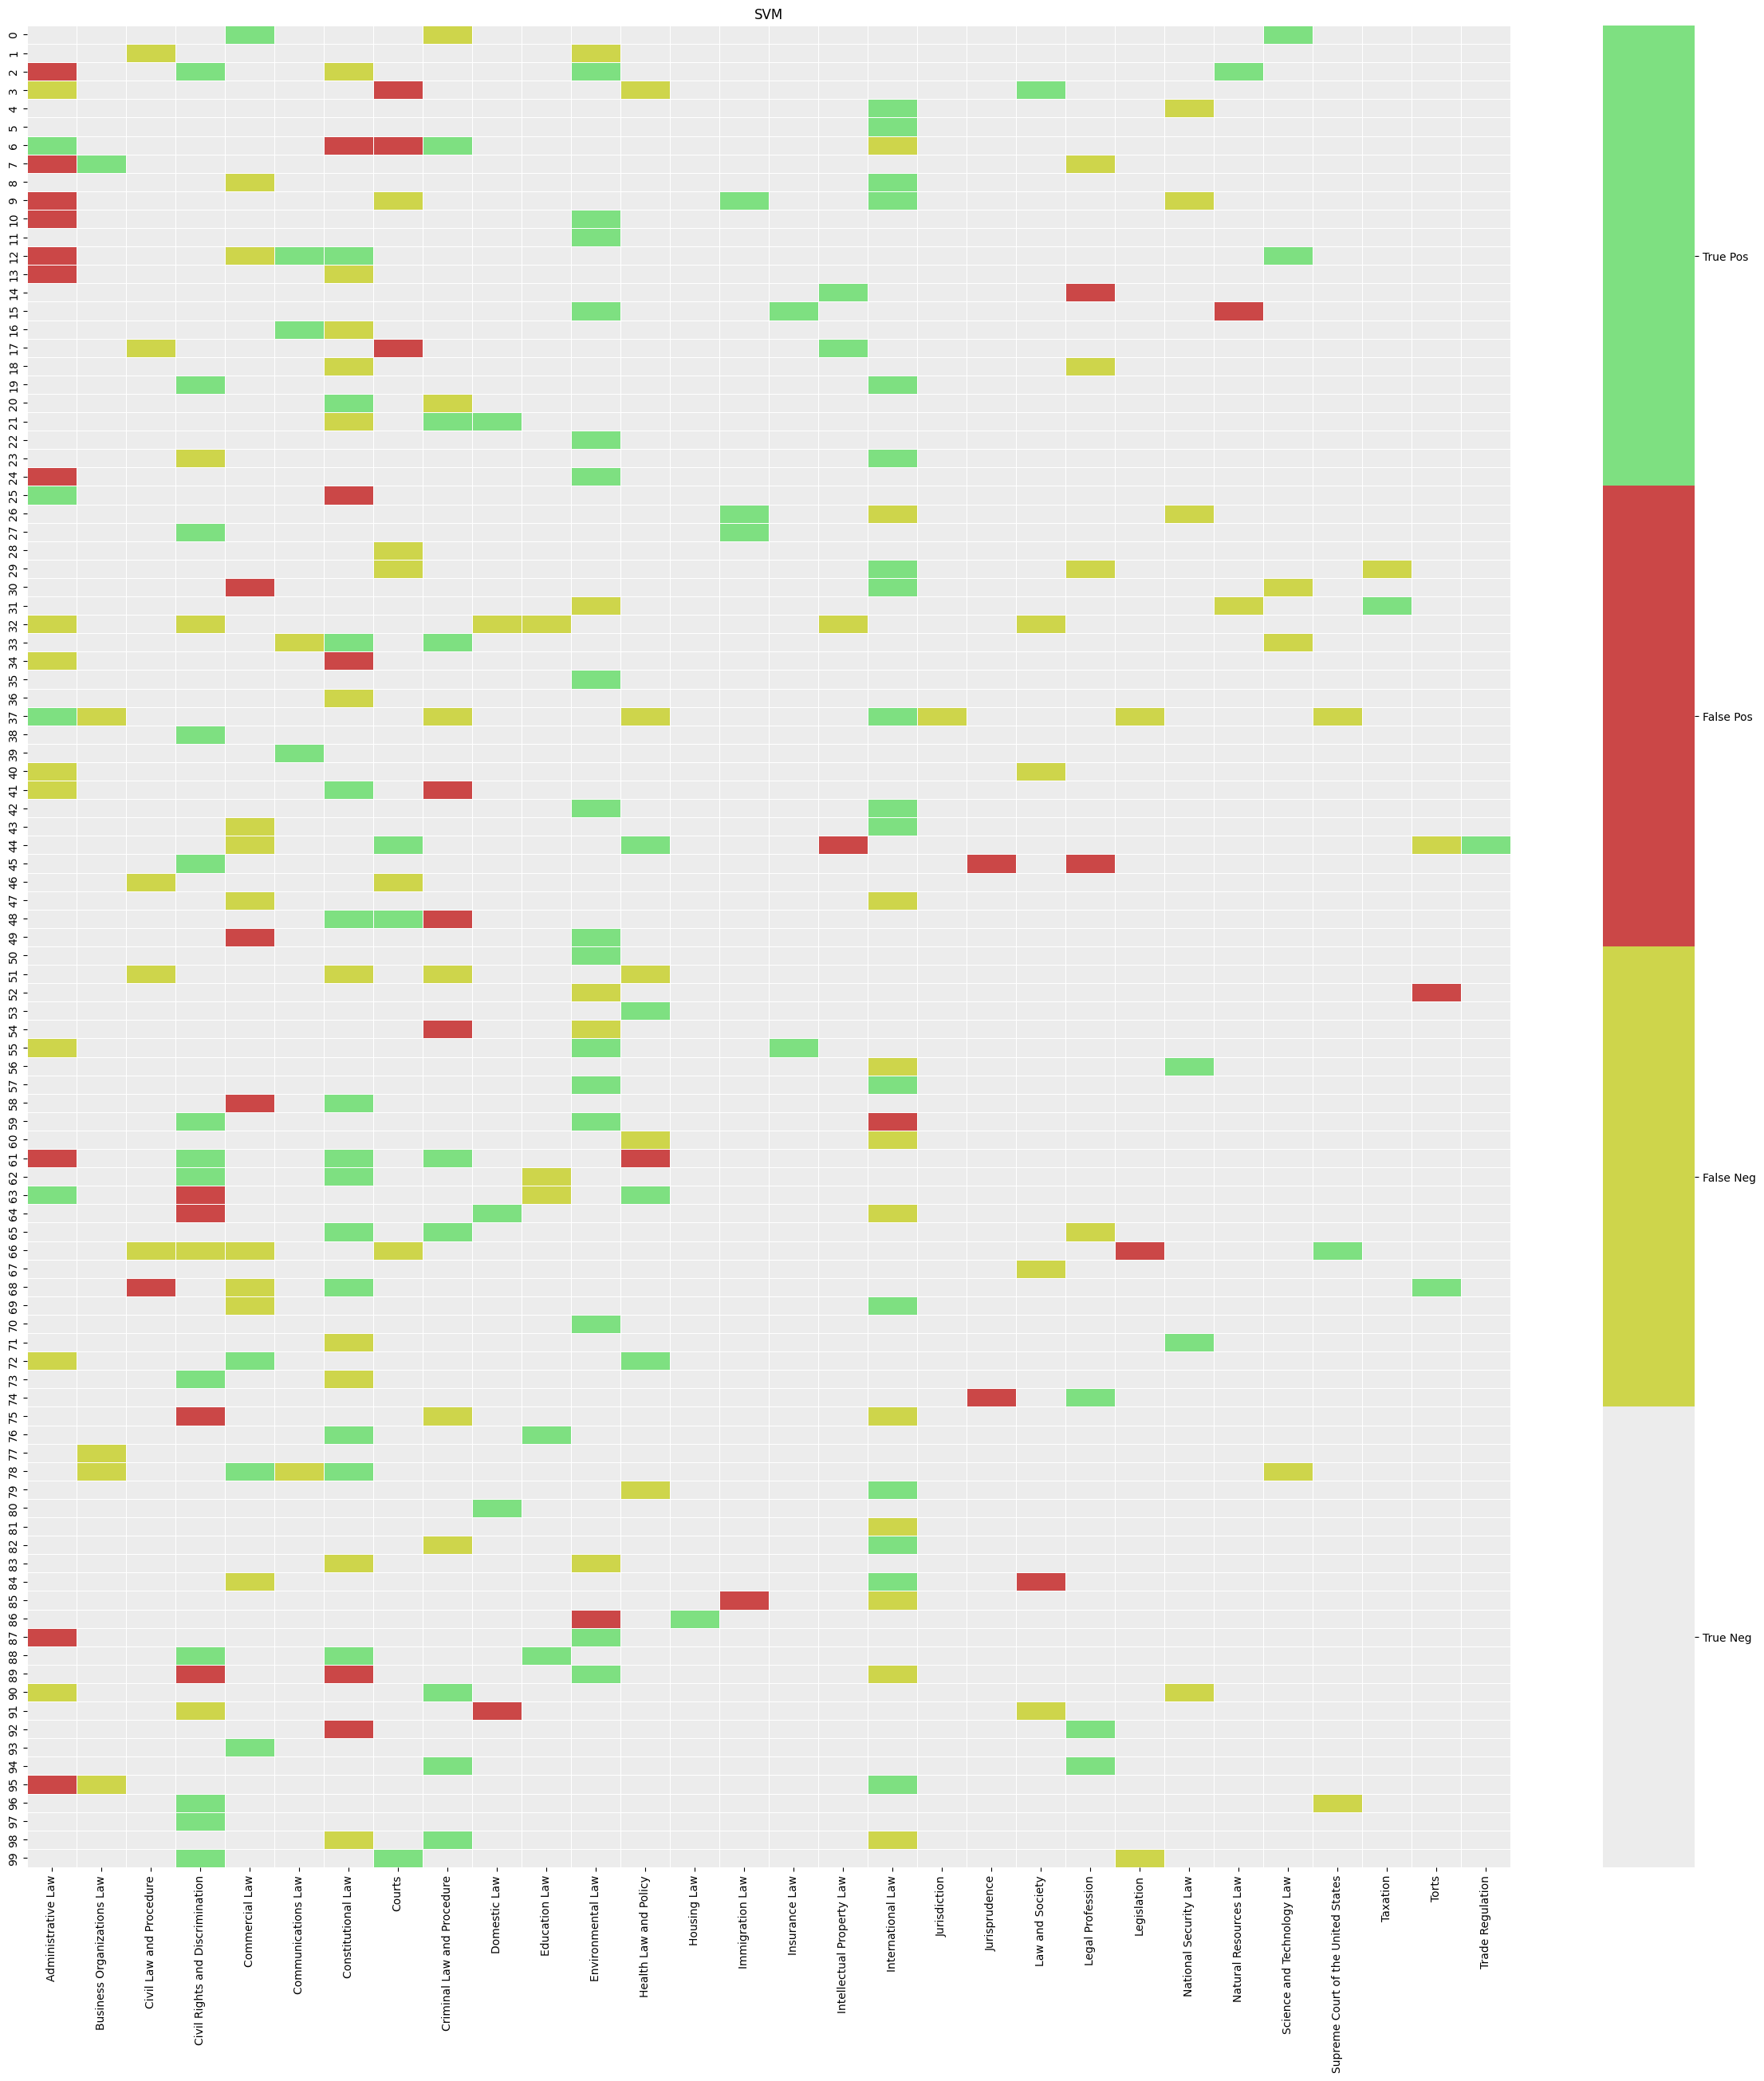

In [ ]:
# Set parameters using optimized set
kernel = 'linear'
prob = False
cw = 'balanced'
rs = 1
C = 10

# Run model
svm_model_1 = MultiOutputClassifier(svm.SVC(kernel=kernel, probability=prob, class_weight=cw, C=C, random_state=rs)).fit(X_train, y_train)
prediction_svm_1 = svm_model_1.predict(X_test)

# Plot Results & Display HL
print('Hamming Loss, SVM: ', round(hamming_loss(y_test, prediction_svm_1),4))
svm_result_1 = visualize_outputs(y_test, pd.DataFrame(prediction_svm_1),"SVM",[0,100])

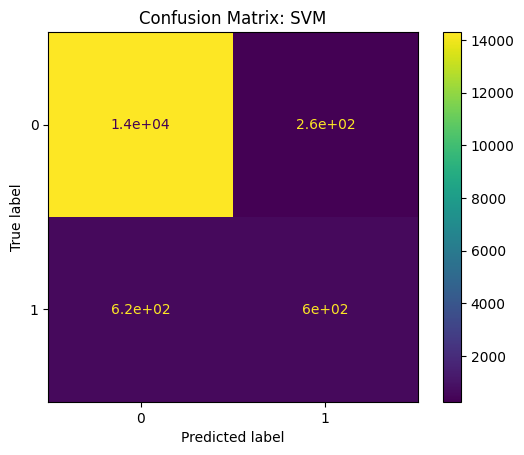

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_result_1)
disp.plot()
plt.title(f'Confusion Matrix: SVM')
plt.show()

In [ ]:
# Vew Precision/Recall Per Label
def precision_recall_per_label(y_test, prediction):
  y_test = pd.DataFrame(y_test)
  prediction = pd.DataFrame(prediction)

  # initialize values
  tp = np.zeros(len(y_test.columns))
  fp = np.zeros(len(y_test.columns))
  fn = np.zeros(len(y_test.columns))
  tn = np.zeros(len(y_test.columns))

  # Iterate over columns
  for i in range(0,len(y_test.columns)):

    # Iterate over rows
    for j in range(0,len(y_test)):

      # determine status of each observation
      if y_test.iloc[j,i] == 1 and prediction.iloc[j,i] == 1:
        tp[i] += 1
      elif y_test.iloc[j,i] == 1 and prediction.iloc[j,i] == 0:
        fn[i] += 1
      elif y_test.iloc[j,i] == 0 and prediction.iloc[j,i] == 1:
        fp[i] += 1
      else:
        tn[i] += 1

  # create DF of values
  stats = pd.DataFrame({'TP':tp, 'FP':fp, 'FN':fn, 'TN':tn}, index=y_test.columns)

  # compute frequency, precision and recall
  stats['Frequency'] = stats['TP'] + stats['FN']
  stats['Precision'] = stats['TP'] / (stats['TP'] + stats['FP'])
  stats['Recall'] = stats['TP'] / (stats['TP'] + stats['FN'])
  stats['F1'] = 2 * (stats['Precision'] * stats['Recall']) / (stats['Precision'] + stats['Recall'])

  return  stats

In [ ]:
# Look at results for SVM model
svm_1_stats = precision_recall_per_label(y_test, prediction_svm_1)
svals = svm_1_stats.sort_values(by='F1', ascending=False)
display(svals)

,TP,FP,FN,TN,Frequency,Precision,Recall,F1
Trade Regulation,7.0,0.0,1.0,518.0,8.0,1.000000,0.875000,0.933333
Environmental Law,84.0,5.0,24.0,413.0,108.0,0.943820,0.777778,0.852792
Immigration Law,17.0,3.0,5.0,501.0,22.0,0.850000,0.772727,0.809524
Intellectual Property Law,15.0,4.0,4.0,503.0,19.0,0.789474,0.789474,0.789474
Taxation,12.0,1.0,8.0,505.0,20.0,0.923077,0.600000,0.727273
Domestic Law,17.0,3.0,10.0,496.0,27.0,0.850000,0.629630,0.723404
Civil Rights and Discrimination,79.0,24.0,40.0,383.0,119.0,0.766990,0.663866,0.711712
Criminal Law and Procedure,49.0,18.0,28.0,431.0,77.0,0.731343,0.636364,0.680556
International Law,70.0,23.0,45.0,388.0,115.0,0.752688,0.608696,0.673077
Insurance Law,10.0,1.0,10.0,505.0,20.0,0.909091,0.500000,0.645161


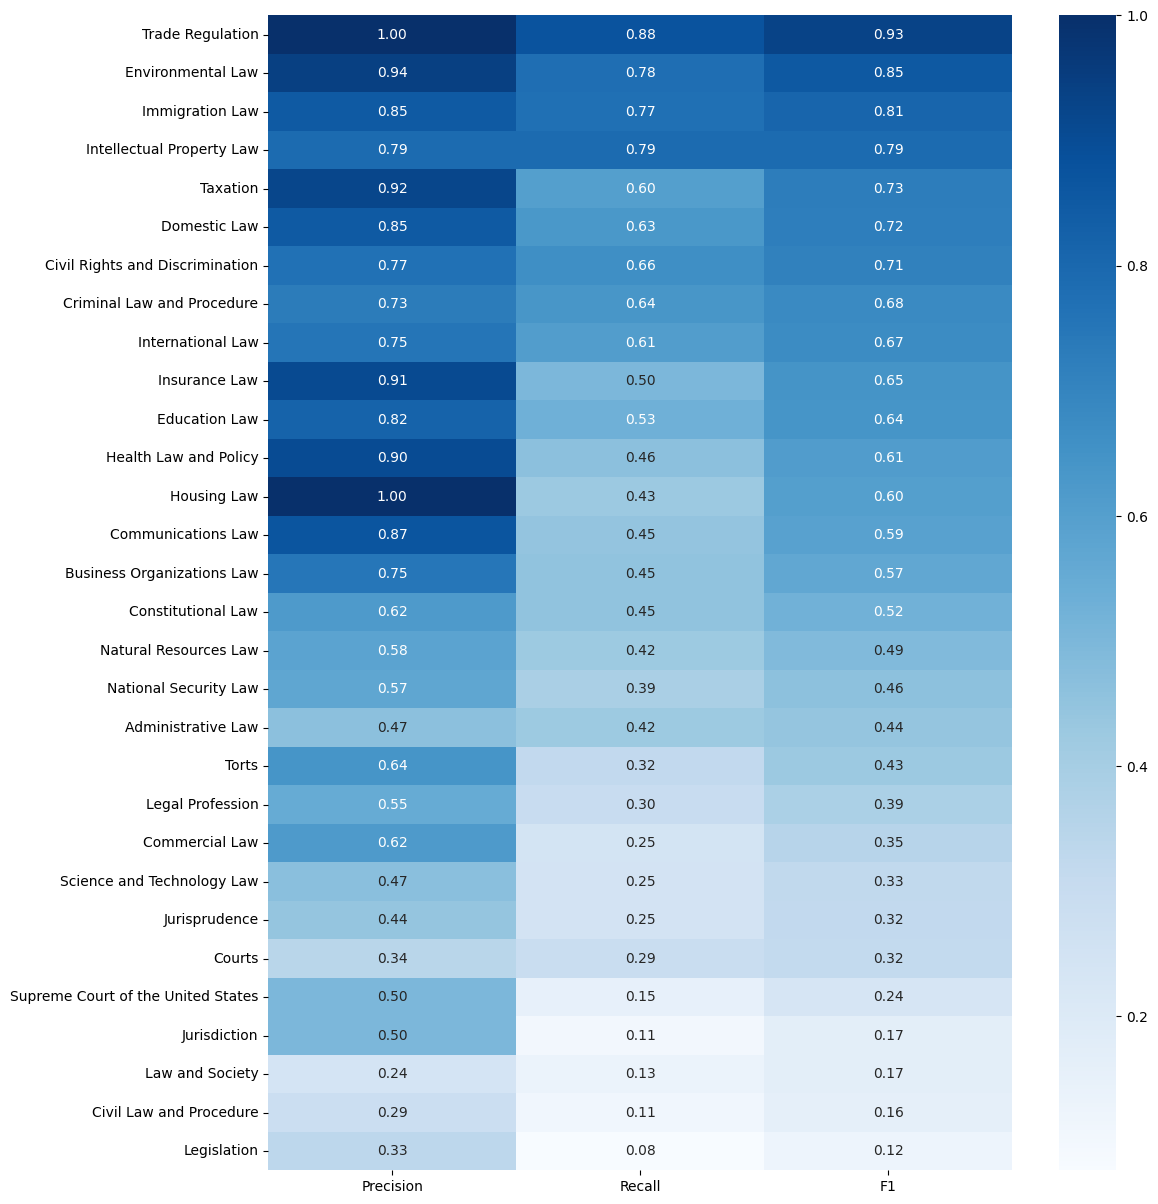

In [ ]:
# Display results as heatmap for visual understanding as well
fig,ax = plt.subplots(figsize=(12,15))
sns.heatmap(svals[["Precision", "Recall", 'F1']], annot=True, fmt='.2f', cmap='Blues', ax=ax)
plt.show()

In [ ]:
# Calculate overall metrics: mean & weighted mean
mean_precision = svm_1_stats['Precision'].mean()
mean_recall = svm_1_stats['Recall'].mean()
mean_f1 = svm_1_stats['F1'].mean()

wmean_precision = svm_1_stats['Precision'] * svm_1_stats['Frequency']
wmean_precision = wmean_precision.sum() / svm_1_stats['Frequency'].sum()
wmean_recall = svm_1_stats['Recall'] * svm_1_stats['Frequency']
wmean_recall = wmean_recall.sum() / svm_1_stats['Frequency'].sum()
wmean_f1 = svm_1_stats['F1'] * svm_1_stats['Frequency']
wmean_f1 = wmean_f1.sum() / svm_1_stats['Frequency'].sum()

print(f'Mean Precision: {mean_precision:.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean F1: {mean_f1:.4f}', "\n")
print(f'Weighted Mean Precision: {wmean_precision:.4f}')
print(f'Weighted Mean Recall: {wmean_recall:.4f}')
print(f'Weighted Mean F1: {wmean_f1:.4f}')

Mean Precision: 0.6675
Mean Recall: 0.4369
Mean F1: 0.5158 

Weighted Mean Precision: 0.6780
Weighted Mean Recall: 0.4885
Weighted Mean F1: 0.5592


In [ ]:
! pip install skops
# Save our model using skops.io
import skops.io as sio
obj = sio.dump(svm_model_1, "../model/label_maker.skops")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 3.8 MB/s eta 0:00:00
